# **PROJET STATISTIQUE**

### **Analyse d'une consultation citoyenne**
**Crise Covid-19 : Comment inventer tous ensemble le monde d'après ?**

# **Importation des bibliothèques**

In [43]:
# from google.colab import drive
# drive.mount('/content/drive')

In [44]:
# !pip install pygal
# !pip install pygal_maps_fr
# !pip install -U "scikit-learn==0.23.1"
# !pip install nltk
# !pip install --upgrade gensim
# !pip install pyLDAvis
# !pip install --upgrade --force-reinstall xlrd
# !pip install --upgrade pandas
# !pip install --upgrade requests
# !pip install --upgrade folium
# !pip install --upgrade scipy
# !pip install --upgrade pandas
# !pip install -U pandas-profiling
# !pip install --upgrade openpyxl

Nous allons tout d'abord importer les bibliothèques qui seront utiles dans le cadre de ce travail.

In [45]:
import pandas as pd  # Importation de la bibliothèque 'pandas' pour la manipulation des données
import numpy as np  # Importation de la bibliothèque 'numpy' pour les calculs numériques efficaces

import json  # Importation de la bibliothèque 'json' pour travailler avec des fichiers JSON
import os  # Importation de la bibliothèque 'os' pour travailler avec les chemins de fichiers
import matplotlib.pyplot as plt  # Importation de la bibliothèque 'matplotlib' pour la visualisation des données
import statistics  # Importation de la bibliothèque 'statistics' pour les calculs statistiques
import spacy.cli #

# import spacy
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import RegexpStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk import stem
from nltk import word_tokenize
from spacy_lefff import LefffLemmatizer, POSTagger

from nltk.stem import WordNetLemmatizer

# **Importation des données**

Nous allons maintenant importer les données qui sont sous format Excel. Mais aussi ceux au forma Json.

Le code qui suit sert simplement créer un dataframe ne contenant que les colonnes qui nous serviront lors de l'analyse descriptive. Cette étape est optionnelle mais permet d'avoir une base de données moins surchargée, ce qui va améliorer le temps d'exécution des programmes.

In [46]:
# Chargement des données depuis un fichier Excel
data = pd.read_excel(os.getcwd() + '\\input\\data\\dataFrame_projetStat.xlsx')

# Sélection des colonnes pertinentes dans les données
colonnes = ['content','agree_count','agreeLikeit_count','agreeDoable_count','agreePlatitudeAgree_count','disagree_count','disagreeNoWay_count','disagreeImpossible_count','disagreePlatitudeDisagree_count','neutral_count','neutralDoNotUnderstand_count','neutralNoOpinion_count','neutralDoNotCare_count','authorPostal_Code','authorAge','selectedStakeTag_label']
BD = data[colonnes]

# Ouverture et chargement des données depuis un fichier JSON
with open(os.getcwd() + '\\input\\data\\ensai2021_mondedapres.json', encoding="utf8") as json_file:
    donnees = json.load(json_file)

In [47]:
#Importation du dataframe final
#mondataframe = pd.read_csv('/content/drive/MyDrive/Projet Statistique/data.csv')

# **1. Analyse descriptive**

## **Analyse de l'âge des citoyens**

La base de données est composée de 18681 propositions dont certaines caractéristiques des auteurs de ces propositions 
ont été renseignées telles que l'âge, la zone d'habitation, etc.

In [48]:
BD.shape  # Renvoie un tuple représentant les dimensions du DataFrame BD (nombre de lignes, nombre de colonnes)

(18681, 16)

Nous allons analyser des statistiques intuitives telles que le total, la moyenne, l'écart-type, le minimum, le maximum.

In [49]:
BD.describe()  # Génère des statistiques descriptives pour les données dans le DataFrame BD

,agree_count,agreeLikeit_count,agreeDoable_count,agreePlatitudeAgree_count,disagree_count,disagreeNoWay_count,disagreeImpossible_count,disagreePlatitudeDisagree_count,neutral_count,neutralDoNotUnderstand_count,neutralNoOpinion_count,neutralDoNotCare_count,authorPostal_Code,authorAge
count,18681.000000,18681.000000,18681.000000,18681.000000,18681.000000,18681.000000,18681.000000,18681.000000,18681.000000,18681.000000,18681.000000,18681.000000,6651.000000,7297.000000
mean,50.959852,13.972592,15.627643,3.317488,5.279268,1.510144,1.348750,1.023286,10.445265,1.304373,3.096890,1.114662,56793.530146,44.666712
std,89.614630,34.338029,29.970790,4.062941,9.214126,4.156239,2.580325,1.604245,11.222149,2.495342,4.020162,1.696835,27535.441107,13.977315
min,-1.000000,-1.000000,-2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,13.000000
25%,12.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,33950.000000,34.000000
50%,28.000000,7.000000,7.000000,2.000000,3.000000,0.000000,1.000000,1.000000,7.000000,0.000000,2.000000,1.000000,64100.000000,44.000000
75%,60.000000,16.000000,18.000000,5.000000,6.000000,2.000000,2.000000,1.000000,14.000000,2.000000,4.000000,2.000000,78100.000000,56.000000
max,3490.000000,1443.000000,1251.000000,75.000000,332.000000,177.000000,86.000000,42.000000,183.000000,49.000000,65.000000,27.000000,99000.000000,86.000000


Comme on peut le voir, les individus effectuant les propositions ont entre 13 et 86 ans. On observe une certaine dispersion au niveau de l'âge avec un écart-type de presque 14.
Pour mieux voir la répartition des âges, on peut se reférer à l'histogramme suivant:

In [50]:
BD['authorAge'].describe().round(2)  # Génère des statistiques descriptives arrondies à deux décimales pour la colonne 'authorAge' du DataFrame BD

count    7297.00
mean       44.67
std        13.98
min        13.00
25%        34.00
50%        44.00
75%        56.00
max        86.00
Name: authorAge, dtype: float64

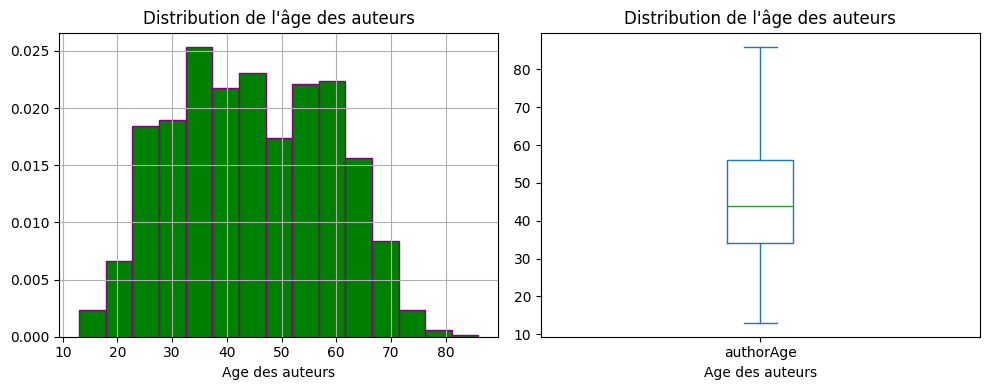

In [51]:
# Histogramme et boîte à moustaches
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # Crée une figure avec une disposition en 1 ligne et 2 colonnes
BD.authorAge.hist(bins=15, color='green', edgecolor='purple', density=True, ax=ax1)  # Dessine un histogramme de la colonne 'authorAge' avec 15 bacs, couleur verte, bordures violettes et normalisation sur le premier axe
ax1.set_title('Distribution de l\'âge des auteurs')  # Définit le titre du premier sous-graphique
ax1.set_xlabel('Age des auteurs')  # Définit le label de l'axe des abscisses du premier sous-graphique

# Dessine une boîte à moustaches pour la colonne 'authorAge' montrant les valeurs aberrantes sur le deuxième axe
BD.plot(column=['authorAge'], kind='box',  ax=ax2)
ax2.set_xlabel('Age des auteurs')  # Définit le label de l'axe des abscisses du deuxième sous-graphique
ax2.set_title('Distribution de l\'âge des auteurs')  # Définit le titre du deuxième sous-graphique

plt.tight_layout()  # Ajuste automatiquement les paramètres de la figure pour s'assurer que rien ne se chevauche
plt.show()  # Affiche la figure

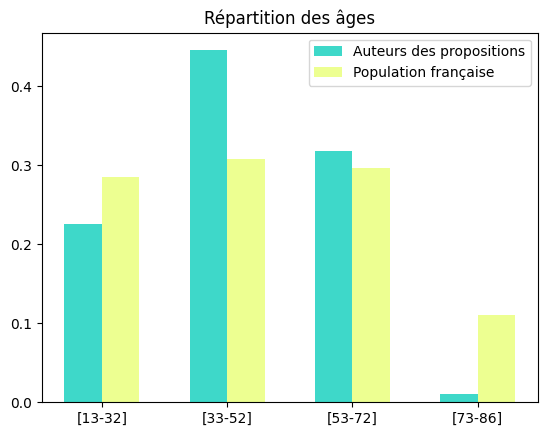

In [52]:
# Population de la base de données
y = pd.crosstab(BD.authorAge, "freq", normalize=True)  # Calcul de la fréquence de chaque âge dans la base de données
frequence_age = list(y['freq'])  # Conversion des fréquences en une liste

# Calcul de la somme des fréquences pour chaque tranche d'âge (20 ans)
L1 = [sum(frequence_age[0:20]), sum(frequence_age[20:40]), sum(frequence_age[40:60]), sum(frequence_age[60:])]

# Population française
dt = pd.read_excel(os.getcwd() + '\\input\\data\\demo-pop-pyram.xlsx')  # Chargement des données de la population française
b = list(dt['Ensemble'])  # Extraction des données pertinentes de la population française
c = b[13:87]  # Sélection des tranches d'âge pertinentes (à partir de 2009)

r = sum(c)  # Calcul de la somme totale de la population française
L2 = [sum(c[0:20]) / r, sum(c[20:40]) / r, sum(c[40:60]) / r, sum(c[60:]) / r]  # Calcul de la proportion de chaque tranche d'âge dans la population française

# Comparaison des âges
largeur_barre = 0.3  # Largeur des barres dans le graphique
x1 = range(len(L1))  # Position des barres pour les données de la base de données
x2 = [i + largeur_barre for i in x1]  # Position des barres pour les données de la population française
g1 = plt.bar(x1, L1, width=largeur_barre, color="#3ED8C9")  # Création des barres pour les données de la base de données
g2 = plt.bar(x2, L2, width=largeur_barre, color="#EDFF91")  # Création des barres pour les données de la population française
plt.xticks([r + largeur_barre / 2 for r in range(len(L1))], ['[13-32]', '[33-52]', '[53-72]', '[73-86]'])  # Positionnement des étiquettes d'âge sur l'axe des abscisses
plt.legend([g1, g2], ['Auteurs des propositions', 'Population française'])  # Ajout d'une légende au graphique
plt.title('Répartition des âges')  # Ajout d'un titre au graphique
plt.show()  # Affichage du graphique

## **Analyse des valeurs manquantes**

Nous allons maintenant nous intéresser aux valeurs manquantes.

In [53]:
# Nombre total de valeurs manquantes pour chaque caractéristique
print(BD.isna().sum())

content                                0
agree_count                            0
agreeLikeit_count                      0
agreeDoable_count                      0
agreePlatitudeAgree_count              0
disagree_count                         0
disagreeNoWay_count                    0
disagreeImpossible_count               0
disagreePlatitudeDisagree_count        0
neutral_count                          0
neutralDoNotUnderstand_count           0
neutralNoOpinion_count                 0
neutralDoNotCare_count                 0
authorPostal_Code                  12030
authorAge                          11384
selectedStakeTag_label                 0
dtype: int64


Il y a donc 12030 valeurs manquantes dans la colonne correspondant aux codes postaux, et 11384 dans la colonne correspondant à l'âge. Comme on peut le voir dans le code qui suit, cela correspond respectivement à 64.40 et 60.94% .

In [54]:
# Calcul du nombre de valeurs manquantes dans la colonne 'authorPostal_Code'
cpNA = BD['authorPostal_Code'].isna().sum()

# Calcul du nombre de valeurs manquantes dans la colonne 'authorAge'
ageNA = BD['authorAge'].isna().sum()

# Calcul du nombre total de propositions dans la base de données
t = BD['content'].count()

# Calcul des proportions de valeurs manquantes pour les codes postaux et les âges
propCp = cpNA / t  # Proportion de valeurs manquantes pour les codes postaux
propAge = ageNA / t  # Proportion de valeurs manquantes pour les âges

# Affichage des proportions de valeurs manquantes pour les codes postaux et les âges
print(propCp, propAge)

0.64396980889674 0.6093892189925593


Ainsi, seules les colonnes concernant l'âge et les codes postaux possèdent des valeurs manquantes.

Dans le dataframe, certaines valeurs liées au nombre de votes sont anormalement négatives (égales à -1 ou -2).
Nous avons fait le choix de les remplacer par 0 au lieu de les supprimer (car elles sont très peu nombreuses).

In [55]:
# Code permettant de remplacer les valeurs négatives par des 0 dans différentes colonnes du DataFrame BD
BD['agree_count'] = BD['agree_count'].apply(lambda x: 0 if x < 0 else x)
BD['disagree_count'] = BD['disagree_count'].apply(lambda x: 0 if x < 0 else x)
BD['neutral_count'] = BD['neutral_count'].apply(lambda x: 0 if x < 0 else x)
BD['agreeLikeit_count'] = BD['agreeLikeit_count'].apply(lambda x: 0 if x < 0 else x)
BD['agreeDoable_count'] = BD['agreeDoable_count'].apply(lambda x: 0 if x < 0 else x)
BD['agreePlatitudeAgree_count'] = BD['agreePlatitudeAgree_count'].apply(lambda x: 0 if x < 0 else x)
BD['disagreeNoWay_count'] = BD['disagreeNoWay_count'].apply(lambda x: 0 if x < 0 else x)
BD['disagreeImpossible_count'] = BD['disagreeImpossible_count'].apply(lambda x: 0 if x < 0 else x)
BD['disagreePlatitudeDisagree_count'] = BD['disagreePlatitudeDisagree_count'].apply(lambda x: 0 if x < 0 else x)
BD['neutralDoNotUnderstand_count'] = BD['neutralDoNotUnderstand_count'].apply(lambda x: 0 if x < 0 else x)
BD['neutralNoOpinion_count'] = BD['neutralNoOpinion_count'].apply(lambda x: 0 if x < 0 else x)
BD['neutralDoNotCare_count'] = BD['neutralDoNotCare_count'].apply(lambda x: 0 if x < 0 else x)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15364\1061671859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BD['agree_count'] = BD['agree_count'].apply(lambda x: 0 if x < 0 else x)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15364\1061671859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BD['disagree_count'] = BD['disagree_count'].apply(lambda x: 0 if x < 0 else x)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15364\1061671859.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

## **Analyse des propositions**

Nous allons tenter de répondre à la question suivante: **quelles sont les propositions ayant le plus de vote?**

Pour répondre à cela, nous allons procéder à la création de la colonne *totalVote* contenant le nombre total de vote, en additionnant le contenu des colonnes *agree_count* et *disagree_count*. Par la suite, on trie par ordre décroissant. Les premières propositions sont donc celles qui ont le plus grand nombre de vote et les dernières sont celles qui en ont le moins.

In [56]:
# Calcul du total de votes pour chaque ligne du DataFrame BD
BD['totalVote'] = [BD.loc[i,'agree_count'] + BD.loc[i,'disagree_count'] + BD.loc[i,'neutral_count'] for i in range(0,len(BD['agree_count']))]

# Affichage des statistiques sur le nombre total de votes
print("Statistiques sur le nombre de votes: ")
BD['totalVote'].describe()

Statistiques sur le nombre de votes: 


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15364\3955930795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BD['totalVote'] = [BD.loc[i,'agree_count'] + BD.loc[i,'disagree_count'] + BD.loc[i,'neutral_count'] for i in range(0,len(BD['agree_count']))]


count    18681.000000
mean        66.685188
std         97.089149
min          0.000000
25%         20.000000
50%         40.000000
75%         84.000000
max       3539.000000
Name: totalVote, dtype: float64

In [57]:
# Tri des propositions par nombre total de votes en ordre décroissant
triA = BD.sort_values(by='totalVote', ascending=False)

# Sélection des colonnes 'content' et 'totalVote' pour les propositions triées
listeA = triA[['content', 'totalVote']]

# Affichage des cinq premières propositions avec leur nombre total de votes
listeA.head()

,content,totalVote
9820,Il faut arrêter l'élevage intensif et mieux su...,3539
9943,"Il faut en finir avec l'élevage intensif, et p...",3035
17032,Il faut réduire l'élevage intensif et industri...,2801
6558,Il faut abandonner l'élevage industriel afin d...,2453
10099,Il faut valoriser la végétalisation de l'alime...,2210


Les trois propositions ayant eu le plus grand nombre de vote sont:

In [58]:
# Affichage du contenu et du nombre total de votes de la proposition située à l'indice 9820 dans le DataFrame BD
print(BD.iloc[9820]['content'])
print(BD.iloc[9820]['totalVote'], "votes.")
print("-----------------------------------------------------------------------------------------------------------------------------")

# Affichage du contenu et du nombre total de votes de la proposition située à l'indice 9943 dans le DataFrame BD
print(BD.iloc[9943]['content'])
print(BD.iloc[9943]['totalVote'], "votes.")
print("-----------------------------------------------------------------------------------------------------------------------------")

# Affichage du contenu et du nombre total de votes de la proposition située à l'indice 17032 dans le DataFrame BD
print(BD.iloc[17032]['content'])
print(BD.iloc[17032]['totalVote'], "votes.")
print("-----------------------------------------------------------------------------------------------------------------------------")

Il faut arrêter l'élevage intensif et mieux surveiller les conditions d'élevage
3539 votes.
-----------------------------------------------------------------------------------------------------------------------------
Il faut en finir avec l'élevage intensif, et privilégier un élevage respectueux du bien-être animal
3035 votes.
-----------------------------------------------------------------------------------------------------------------------------
Il faut réduire l'élevage intensif et industriel et encourager financièrement les élevages bio, éthiques, durables et locaux.
2801 votes.
-----------------------------------------------------------------------------------------------------------------------------


In [59]:
# Définition d'une liste contenant uniquement le nombre 0
nul = [0]

# Filtrage des propositions ayant un nombre total de votes égal à 0
filtered_nul = listeA[listeA.totalVote.isin(nul)]

# Comptage du nombre de propositions filtrées
filtered_nul.count()

content      239
totalVote    239
dtype: int64

Comme on peut le voir, il y a 239 propositions qui n'ont au aucun vote, soit 1.38% des propositions. Parmi ces propositions, il y a par exemple:

In [60]:
# Affichage du contenu de la proposition située à l'indice 15362 dans le DataFrame BD
print(BD.iloc[15362]['content'])

# Affichage du contenu de la proposition située à l'indice 17088 dans le DataFrame BD
print(BD.iloc[17088]['content'])

Il faut favoriser les dalles auto drainantes dans les aires de parking pour éviter le ruissellement/réduire les risques d'inondation.
Il faut passer à  une économie circulaire, produire moins mais mieux. Donner du sens à  nos achats (locaux, réutilisables, écologiques).


Nous allons maintenant tenter de répondre à la question: **quelles sont les propositions qui apportent le plus de divergence?** et **quelles sont celles pour les quelles il y a unanimité?**.

Nous commençons par créer la colonne **poids** qui va contenir les poids accordés à chaque proposition en fonction du nombre de votes.

In [61]:
# Affectation des poids en se basant sur les quantiles
BD = BD.assign(poids=0)  # Création d'une colonne 'poids' initialisée à 0 dans le DataFrame BD

# Affectation des poids en fonction des quantiles du nombre total de votes
BD['poids'] = BD.apply(lambda x: 0.15 if x['totalVote'] > 0 and x['totalVote'] <= 20 else x['poids'], axis=1)
BD['poids'] = BD.apply(lambda x: 0.20 if x['totalVote'] > 20 and x['totalVote'] <= 40 else x['poids'], axis=1)
BD['poids'] = BD.apply(lambda x: 0.25 if x['totalVote'] > 40 and x['totalVote'] <= 84 else x['poids'], axis=1)
BD['poids'] = BD.apply(lambda x: 0.4 if x['totalVote'] > 84 else x['poids'], axis=1)

In [62]:
# Création d'un tableau des poids en fonction des intervalles de votes
poids = ['0.15', '0.20', '0.25', '0.40']  # Définition des poids correspondant à chaque intervalle
intervalles = ['Moins de 20', ']20-40]', ']40-84]', 'Plus de 84']  # Définition des intervalles de votes
table = pd.DataFrame({'Nombre de votes': intervalles, 'Poids': poids})  # Création du DataFrame 'table' avec les intervalles et les poids associés
table

,Nombre de votes,Poids
0,Moins de 20,0.15
1,]20-40],0.20
2,]40-84],0.25
3,Plus de 84,0.40


Création de la colonne **unanimite** qui contient le rapport: poids * (d'accord - pas d'accord) / (d'accord + pas d'accord).
On crée ensuite la colonne **tri** pour pouvoir effectuer un second tri afin d'éviter les doublons: unanimite * (d'accord - pas d'accord)

In [63]:
# Définition des colonnes pour le DataFrame BD
col = ['content', 'totalVote', 'agree_count', 'disagree_count', 'neutral_count', 'poids', 'unanimite', 'tri']

# Calcul de la somme des votes d'accord et de désaccord pour chaque proposition
somme = [BD.loc[i,'agree_count'] + BD.loc[i,'disagree_count'] for i in range(0, len(BD['agree_count']))]

# Calcul de la différence entre les votes d'accord et de désaccord pour chaque proposition
difference = [abs(BD.loc[i,'agree_count'] - BD.loc[i,'disagree_count']) for i in range(0, len(BD['agree_count']))]

# Calcul de la colonne 'unanimite' dans le DataFrame BD
BD['unanimite'] = difference * BD['poids'] / somme

# Calcul de la colonne 'tri' dans le DataFrame BD
BD['tri'] = BD['unanimite'] * difference

In [64]:
# Calcul de la colonne 'div' dans le DataFrame BD
BD['div'] = [abs(BD.loc[i,'agree_count'] - BD.loc[i,'disagree_count']) * BD.loc[i,'poids'] / (BD.loc[i,'agree_count'] + BD.loc[i,'disagree_count'] + BD.loc[i,'neutral_count']) for i in range(0, len(BD['agree_count']))]

# Tri des propositions par la valeur de la colonne 'div' en ordre décroissant
triB = BD.sort_values(by='div', ascending=False)

# Sélection des colonnes pertinentes pour le DataFrame listeB
listeB = triB[['content', 'div', 'agree_count', 'disagree_count', 'neutral_count', 'poids']]

# Suppression des lignes contenant des valeurs manquantes dans le DataFrame listeB et affichage des cinq dernières lignes
listeB.dropna().tail()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15364\2356301314.py:2: RuntimeWarning: invalid value encountered in scalar divide
  BD['div'] = [abs(BD.loc[i,'agree_count'] - BD.loc[i,'disagree_count']) * BD.loc[i,'poids'] / (BD.loc[i,'agree_count'] + BD.loc[i,'disagree_count'] + BD.loc[i,'neutral_count']) for i in range(0, len(BD['agree_count']))]


,content,div,agree_count,disagree_count,neutral_count,poids
951,Il faut lister tous les conflits d'intérêts da...,0.0,5,5,7,0.15
9666,Il faut considérer les dépenses de santé et le...,0.0,6,6,11,0.20
958,Il faut supprimer le wifi au profit du filaire...,0.0,6,6,6,0.15
16575,Il faut changer notre système d'élections (scr...,0.0,2,2,3,0.15
2731,"Il faut, dans les grandes distributions, insta...",0.0,7,7,8,0.20


Parmi les propositions de plus de 3000 votes sur lesquelles les avis divergents, il y a par exemple:

In [65]:
# Sélection des colonnes pertinentes et suppression des lignes contenant des valeurs manquantes dans le DataFrame BD
BD_tri = BD[col].dropna()

# Tri des propositions dans le DataFrame BD_tri par les colonnes 'unanimite' et 'tri' en ordre décroissant
BD_tri = BD_tri.sort_values(by=['unanimite', 'tri'], ascending=[False, False])

# Création d'un masque pour filtrer les propositions ayant un nombre total de votes supérieur ou égal à 2000
BD_mask = BD_tri['totalVote'] >= 2000

# Application du masque pour sélectionner les propositions filtrées dans le DataFrame BD_tri
filtered_BD_tri = BD_tri[BD_mask]

# Affichage des propositions filtrées
filtered_BD_tri

,content,totalVote,agree_count,disagree_count,neutral_count,poids,unanimite,tri
10099,Il faut valoriser la végétalisation de l'alime...,2210,2184,4,22,0.4,0.398537,868.811700
6558,Il faut abandonner l'élevage industriel afin d...,2453,2435,8,10,0.4,0.397380,964.441916
9820,Il faut arrêter l'élevage intensif et mieux su...,3539,3490,18,31,0.4,0.395895,1374.547777
9943,"Il faut en finir avec l'élevage intensif, et p...",3035,2976,19,40,0.4,0.394925,1167.792855
3234,Il faut interdire l'élevage intensif,2172,2107,23,42,0.4,0.391362,815.597371
17032,Il faut réduire l'élevage intensif et industri...,2801,2691,51,59,0.4,0.385120,1016.717724
2447,Il faut tendre vers une végétalisation totale ...,2026,1751,105,170,0.4,0.354741,583.904310


In [66]:
# Affichage du contenu de la proposition située à l'indice 10099 dans le DataFrame BD, ainsi que le nombre de votes pour, contre et neutres
print(BD.iloc[10099]['content'])
print(BD.iloc[10099]['agree_count'], "votes pour.\t", BD.iloc[10099]['disagree_count'], "votes contre.\t", BD.iloc[10099]['neutral_count'], "votes neutres.\t")
print("-----------------------------------------------------------------------------------------------------------------------------")

# Affichage du contenu de la proposition située à l'indice 6558 dans le DataFrame BD, ainsi que le nombre de votes pour, contre et neutres
print(BD.iloc[6558]['content'])
print(BD.iloc[6558]['agree_count'], "votes pour.\t", BD.iloc[6558]['disagree_count'], "votes contre.\t", BD.iloc[6558]['neutral_count'], "votes neutres.\t")
print("-----------------------------------------------------------------------------------------------------------------------------")

# Affichage du contenu de la proposition située à l'indice 9820 dans le DataFrame BD, ainsi que le nombre de votes pour, contre et neutres
print(BD.iloc[9820]['content'])
print(BD.iloc[9820]['agree_count'], "votes pour.\t", BD.iloc[9820]['disagree_count'], "votes contre.\t", BD.iloc[9820]['neutral_count'], "votes neutres.\t")
print("-----------------------------------------------------------------------------------------------------------------------------")

Il faut valoriser la végétalisation de l'alimentation, meilleure pour la santé, la planète et les autres êtres vivants.
2184 votes pour.	 4 votes contre.	 22 votes neutres.	
-----------------------------------------------------------------------------------------------------------------------------
Il faut abandonner l'élevage industriel afin de respecter une éthique concernant la souffrance animale.
2435 votes pour.	 8 votes contre.	 10 votes neutres.	
-----------------------------------------------------------------------------------------------------------------------------
Il faut arrêter l'élevage intensif et mieux surveiller les conditions d'élevage
3490 votes pour.	 18 votes contre.	 31 votes neutres.	
-----------------------------------------------------------------------------------------------------------------------------


Parmi les propositions de plus de 500 votes sur lesquelles les avis divergent, il y a :

In [67]:
# Sélection des colonnes pertinentes et suppression des lignes contenant des valeurs manquantes dans le DataFrame BD
BD_tri = BD[col].dropna()

# Tri des propositions dans le DataFrame BD_tri par les colonnes 'unanimite' et 'tri' en ordre croissant
BD_tri = BD_tri.sort_values(by=['unanimite', 'tri'], ascending=[True, True])

# Création d'un masque pour filtrer les propositions ayant un nombre total de votes supérieur ou égal à 500
BD_mask = BD_tri['totalVote'] >= 500

# Application du masque pour sélectionner les propositions filtrées dans le DataFrame BD_tri
filtered_BD_tri = BD_tri[BD_mask]

# Affichage des cinq dernières propositions filtrées
filtered_BD_tri.tail()

,content,totalVote,agree_count,disagree_count,neutral_count,poids,unanimite,tri
6558,Il faut abandonner l'élevage industriel afin d...,2453,2435,8,10,0.4,0.397380,964.441916
13262,Il faut plus d'éthique alimentaire pour le res...,1846,1817,5,24,0.4,0.397805,720.821954
1663,Il faut repenser notre alimentation vers plus ...,917,909,2,6,0.4,0.398244,361.207025
10099,Il faut valoriser la végétalisation de l'alime...,2210,2184,4,22,0.4,0.398537,868.811700
13025,Il faut stopper l'élevage intensif et l'agricu...,942,939,0,3,0.4,0.400000,375.600000


In [68]:
# Affichage du contenu de la proposition située à l'indice 7158 dans le DataFrame BD, ainsi que le nombre de votes pour, contre et neutres
print(BD.iloc[7158]['content'])
print(BD.iloc[7158]['agree_count'], "votes pour.\t", BD.iloc[7158]['disagree_count'], "votes contre.\t", BD.iloc[7158]['neutral_count'], "votes neutres.\t")
print("-----------------------------------------------------------------------------------------------------------------------------")

# Affichage du contenu de la proposition située à l'indice 14375 dans le DataFrame BD, ainsi que le nombre de votes pour, contre et neutres
print(BD.iloc[14375]['content'])
print(BD.iloc[14375]['agree_count'], "votes pour.\t", BD.iloc[14375]['disagree_count'], "votes contre.\t", BD.iloc[14375]['neutral_count'], "votes neutres.\t")
print("-----------------------------------------------------------------------------------------------------------------------------")

# Affichage du contenu de la proposition située à l'indice 7398 dans le DataFrame BD, ainsi que le nombre de votes pour, contre et neutres
print(BD.iloc[7398]['content'])
print(BD.iloc[7398]['agree_count'], "votes pour.\t", BD.iloc[7398]['disagree_count'], "votes contre.\t", BD.iloc[7398]['neutral_count'], "votes neutres.\t")
print("-----------------------------------------------------------------------------------------------------------------------------")

Il faut libérer le travail notamment hors limite de 35h et primer les résultats collectifs des salariés
238 votes pour.	 225 votes contre.	 128 votes neutres.	
-----------------------------------------------------------------------------------------------------------------------------
Il faut mettre en place un revenu universel pour que le travail soit un choix et non plus une obligation
390 votes pour.	 308 votes contre.	 117 votes neutres.	
-----------------------------------------------------------------------------------------------------------------------------
Il faut créer un mouvement de désobéissance civile, force citoyenne décisive pour redéfinir les priorités de nos sociétés.
453 votes pour.	 332 votes contre.	 183 votes neutres.	
-----------------------------------------------------------------------------------------------------------------------------


## **Analyse des tags manuels**

Pour répondre à la question **quels sont les tags les plus utilisés**, nous allons procéder comme suit: 

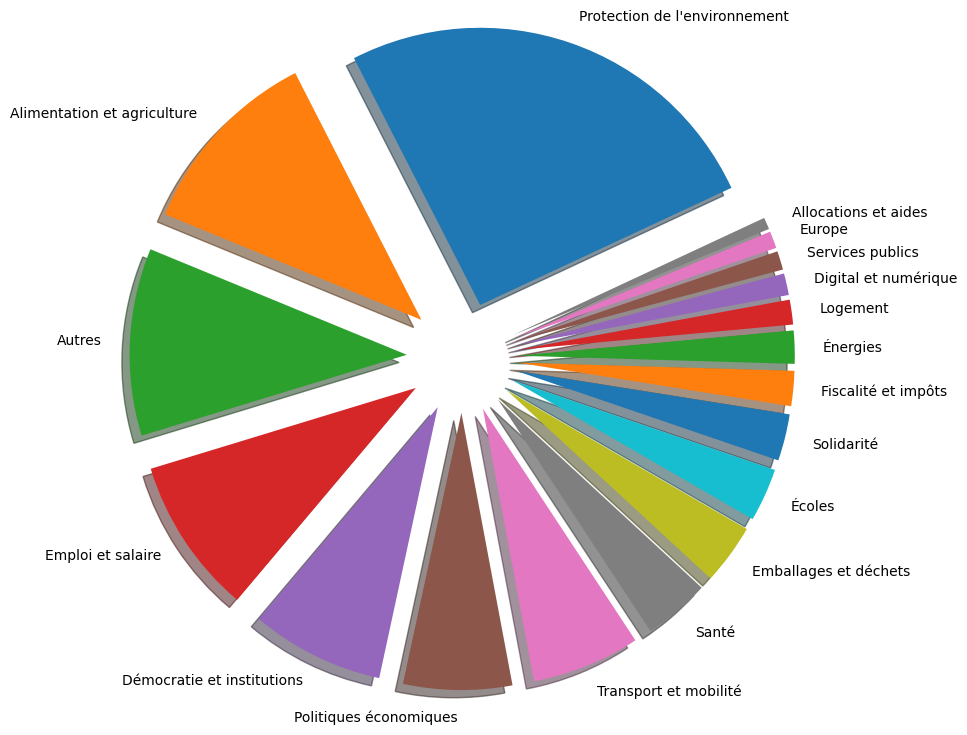

In [69]:
# La méthode unique() permet de voir la liste des éléments de la colonne sans répétition
# Cela nous donne un aperçu des différentes catégories présentes dans la colonne 'selectedStakeTag_label'
BD.selectedStakeTag_label.unique()

# La fonction pd.crosstab() permet de créer une table de contingence pour les variables spécifiées
# Dans ce cas, elle génère un tableau croisé des catégories dans la colonne 'selectedStakeTag_label' avec les fréquences normalisées
# La normalisation est effectuée en divisant chaque cellule par le nombre total d'observations, ce qui donne des fréquences relatives
A = pd.crosstab(BD.selectedStakeTag_label, "freq", normalize=True)

# Tri des catégories par fréquence en ordre décroissant
B = A.sort_values(by='freq', ascending=False)

# Diagramme circulaire
labels1 = B.index.tolist()  # Récupération des catégories pour les libellés du diagramme
values1 = list(B['freq'])   # Récupération des fréquences normalisées pour les valeurs du diagramme

# Définition de l'explosion des tranches pour mettre en évidence certaines catégories
explode = [0.2 for i in range(18)]  # Ici, nous choisissons d'exploser toutes les tranches pour les mettre en évidence

# Création du diagramme circulaire avec les étiquettes et les explosions définies
plt.figure(figsize=(9, 9))
plt.pie(values1, labels=labels1, explode=explode, shadow=True, startangle=25)
plt.show()

Partant de cela, nous pouvons voir quelles sont les catégories de propositions dans lesquelles il y a le plus de propositions en se basant sur les tags actuels. Ils sont au nombre de 18.

Ainsi, la plupart des propositions concernent la protection de l'environnement, puis l'alimentation et l'agriculture. Il y a cependant très peu de propositions concernant par exemple les aides et allocations. Par ailleurs, plus de 10% des propositions n'ont pas de catégories spécifiques (voir le tag 'Autres').

En s'interrogeant sur le fait de savoir **quelle catégorie d'âge effectue le plus de propositions**, nous avons défini cinq classes d'âge (de manière subjective).

In [70]:
# Création d'une plage de nombres de 0 à 100 inclus
plage = [i for i in range(0, 101)]

# Définition des tranches d'âge
jeunes = plage[13:26]            # Tranche des jeunes (de 13 à 25 ans)
jeunesActifs = plage[26:40]      # Tranche des jeunes actifs (de 26 à 39 ans)
actifs = plage[40:62]            # Tranche des actifs (de 40 à 61 ans)
jeunesRetraites = plage[62:71]   # Tranche des jeunes retraités (de 62 à 70 ans)
retraites = plage[71:87]         # Tranche des retraités (de 71 à 86 ans)

# Filtrage des données en fonction des tranches d'âge définies
filtered_jeunes = BD[BD.authorAge.isin(jeunes)]
filtered_jeunesActifs = BD[BD.authorAge.isin(jeunesActifs)]
filtered_actifs = BD[BD.authorAge.isin(actifs)]
filtered_jeunesRetraites = BD[BD.authorAge.isin(jeunesRetraites)]
filtered_retraites = BD[BD.authorAge.isin(retraites)]

In [71]:
# Définition des classes d'âge et des intervalles correspondants
classeAge = ['Jeunes', 'Jeunes actifs', 'Actifs', 'Jeunes retraités', 'Retraités']
intervalles = ['[13-25]', '[26-39]', '[40-61]', '[62-71]', '[72-86]']

# Calcul des effectifs pour chaque tranche d'âge filtrée
effectifs = [
    filtered_jeunes['authorAge'].count(),
    filtered_jeunesActifs['authorAge'].count(),
    filtered_actifs['authorAge'].count(),
    filtered_jeunesRetraites['authorAge'].count(),
    filtered_retraites['authorAge'].count()
]

# Calcul des proportions en pourcentage pour chaque tranche d'âge
freq = ((effectifs / (t - ageNA)).round(3)) * 100

# Calcul des proportions en pourcentage par rapport à l'ensemble des données pour chaque tranche d'âge
prop = ((effectifs / t).round(3)) * 100

# Création du DataFrame pour présenter les statistiques des tranches d'âge
tab = pd.DataFrame({
    'Classes âge': classeAge,
    'Tranches d\'âge': intervalles,
    'Effectif par tranche d\'âge': effectifs,
    'Proportion par effectif (%)': prop,
    'Fréquence des propositions (%)': freq
})

Ainsi, en se basant sur nos classes d'âge, les actifs (entre 40 et 61 ans) sont ceux qui effectuent le plus de propositions. Viennent ensuite les jeunes actifs (entre 26 et 39 ans). Enfin, les plus de 71 ans sont ceux qui font le moins de propositions.

Il serait également intéressant d'**étudier les propositions en fonction de l'âge des individus**.

Premièrement, la question à la quelle nous allons maintenant répondre est **quels sont les domaines dans lesquelles les jeunes effectuent le plus de propositions?**

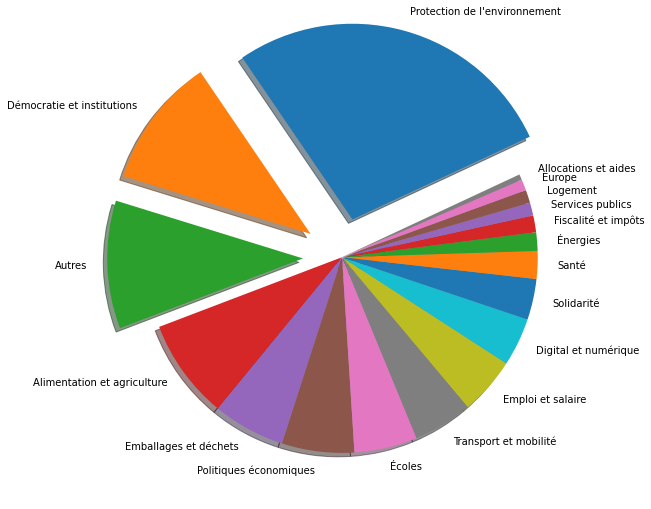

In [ ]:
# Calcul des fréquences normalisées des catégories dans la colonne 'selectedStakeTag_label' pour les jeunes
j1 = pd.crosstab(filtered_jeunes.selectedStakeTag_label, "freq", normalize=True)

# Tri des catégories par fréquence en ordre décroissant
j11 = j1.sort_values(by='freq', ascending=False)

# Diagramme circulaire pour les catégories les plus fréquentes parmi les jeunes
labels2 = j11.index.tolist()     # Récupération des catégories pour les libellés du diagramme
values2 = list(j11['freq'])      # Récupération des fréquences normalisées pour les valeurs du diagramme
explode2 = [0 for i in range(18)]  # Initialisation de l'explosion des tranches à zéro
explode2[0] = 0.2                 # Définition de l'explosion pour la première catégorie
explode2[1] = 0.2                 # Définition de l'explosion pour la deuxième catégorie
explode2[2] = 0.2                 # Définition de l'explosion pour la troisième catégorie

# Création du diagramme circulaire avec les étiquettes, les valeurs et les explosions définies
plt.figure(figsize=(9, 9))
plt.pie(values2, labels=labels2, explode=explode2, shadow=True, startangle=25)
plt.show()

Comme on peut le voir, les propositions faites par les jeunes concernent généralement la protection de l'environnement et la démocratie et les institutions. On pourrait de même s'intéresser aux autres tranches d'âge.

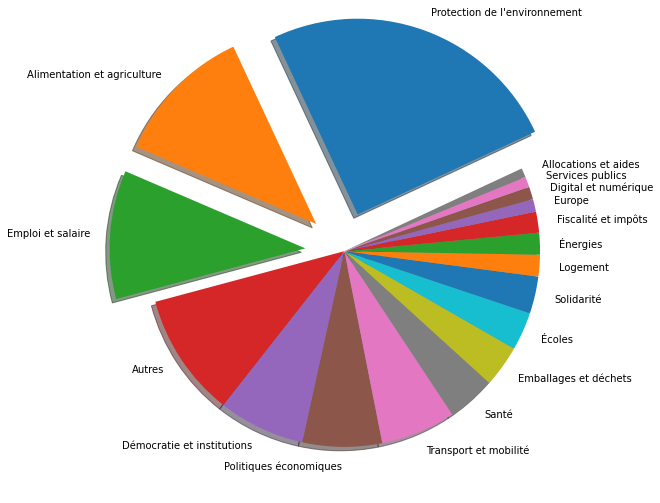

In [ ]:
# Calcul des fréquences normalisées des catégories dans la colonne 'selectedStakeTag_label' pour les actifs
act = pd.crosstab(filtered_actifs.selectedStakeTag_label, "freq", normalize=True)

# Tri des catégories par fréquence en ordre décroissant
act1 = act.sort_values(by='freq', ascending=False)

# Diagramme circulaire pour les catégories les plus fréquentes parmi les actifs
labels3 = act1.index.tolist()     # Récupération des catégories pour les libellés du diagramme
values3 = list(act1['freq'])      # Récupération des fréquences normalisées pour les valeurs du diagramme

# Création du diagramme circulaire avec les étiquettes, les valeurs et les explosions définies précédemment
plt.figure(figsize=(9, 9))
plt.pie(values3, labels=labels3, explode=explode2, shadow=True, startangle=25)
plt.show()

Dans cette tranche d'âge (les actifs) , les propositions concernent également en majorité la protection de l'environnement. Cependant, l'alimentation et l'agriculture arrivent en deuxième place.

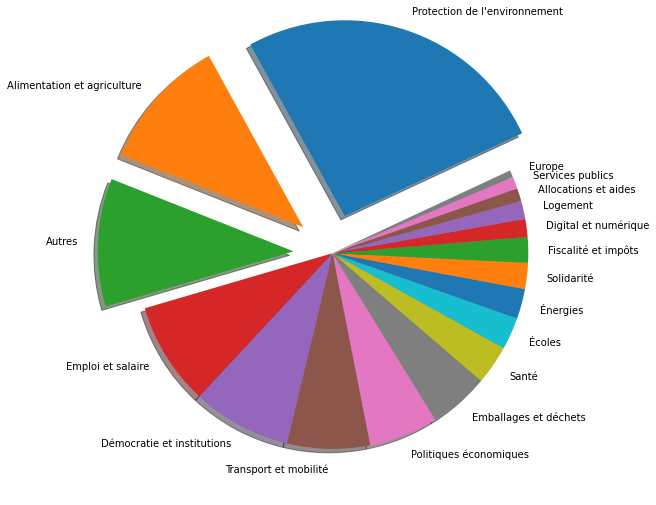

In [ ]:
# Calcul des fréquences normalisées des catégories dans la colonne 'selectedStakeTag_label' pour les jeunes actifs
j2 = pd.crosstab(filtered_jeunesActifs.selectedStakeTag_label, "freq", normalize=True)

# Tri des catégories par fréquence en ordre décroissant
j22 = j2.sort_values(by='freq', ascending=False)

# Diagramme circulaire pour les catégories les plus fréquentes parmi les jeunes actifs
labels4 = j22.index.tolist()     # Récupération des catégories pour les libellés du diagramme
values4 = list(j22['freq'])      # Récupération des fréquences normalisées pour les valeurs du diagramme

# Création du diagramme circulaire avec les étiquettes, les valeurs et les explosions définies précédemment
plt.figure(figsize=(9, 9))
plt.pie(values4, labels=labels4, explode=explode2, shadow=True, startangle=25)
plt.show()

## **Analyse de la zone géographique**

**Analyse de l'âge**


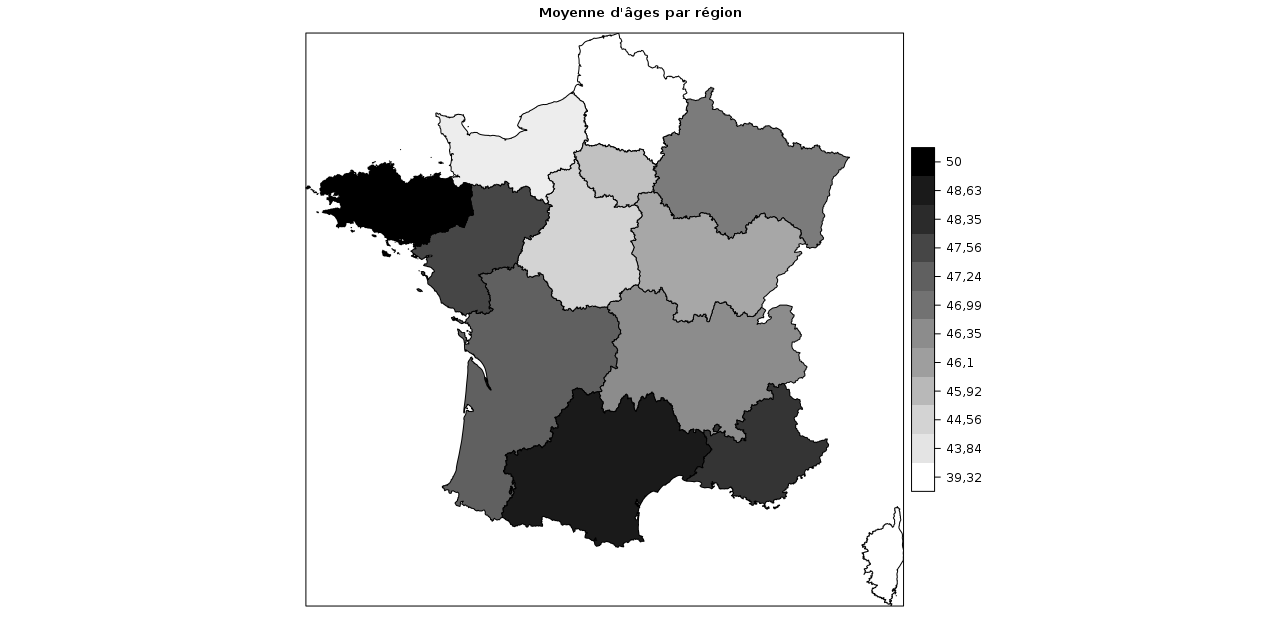

**Analyse du nombre de propositions**

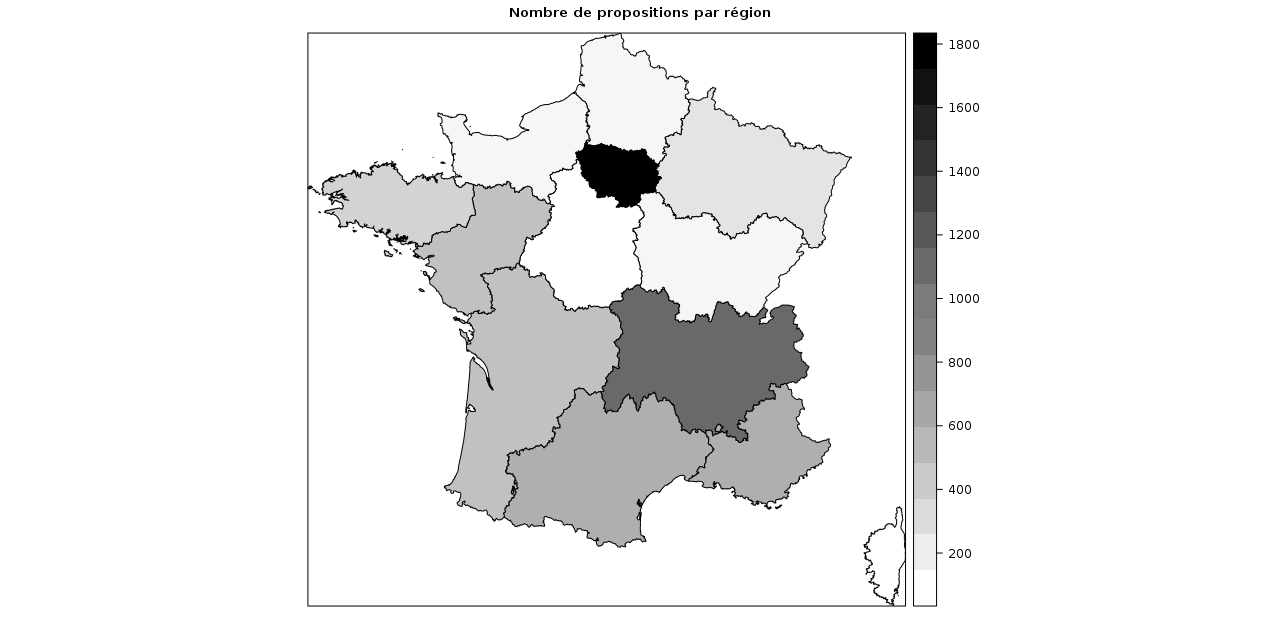

On peut comparer la répartition du nombre de propositions par région avec la répartition de la population légale sur le territoire.

D'abord, on regarde la répartition de la population française sur le territoire :


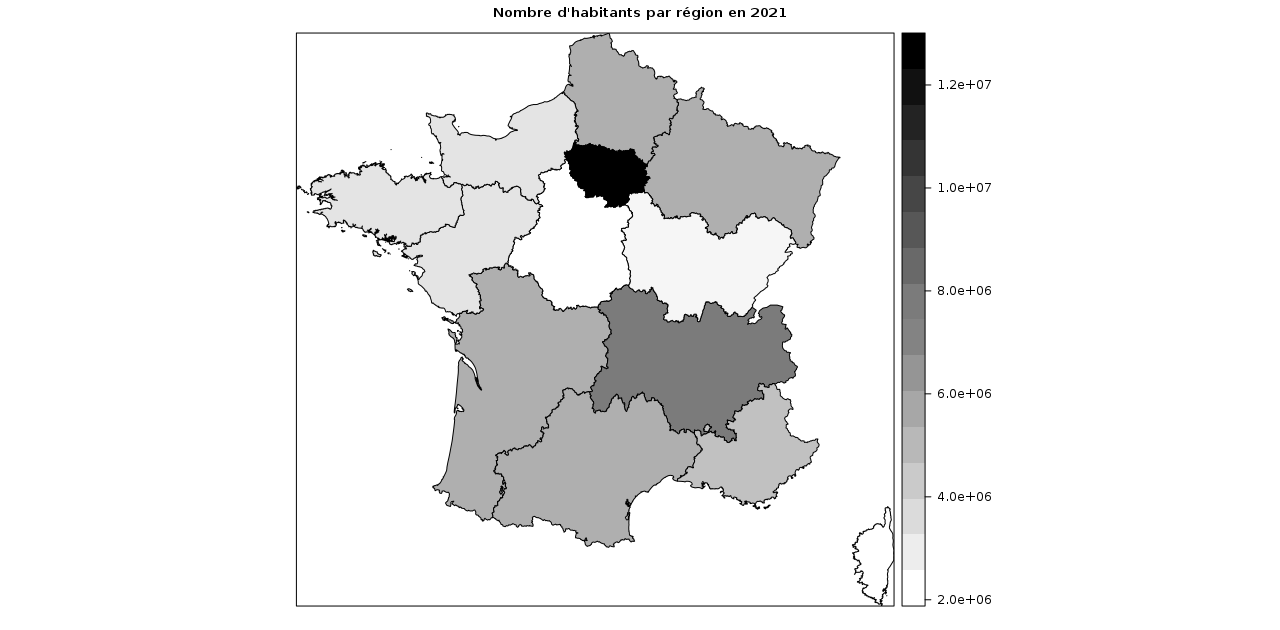

Sur la carte suivante est représentée le rapport de la proportion du nombre votes par région sur la proportion du nombre d'habitants de cette région. Ainsi, on peut savoir si le nombre de votes pour une région donnée sera représentatif de la population globale en France.

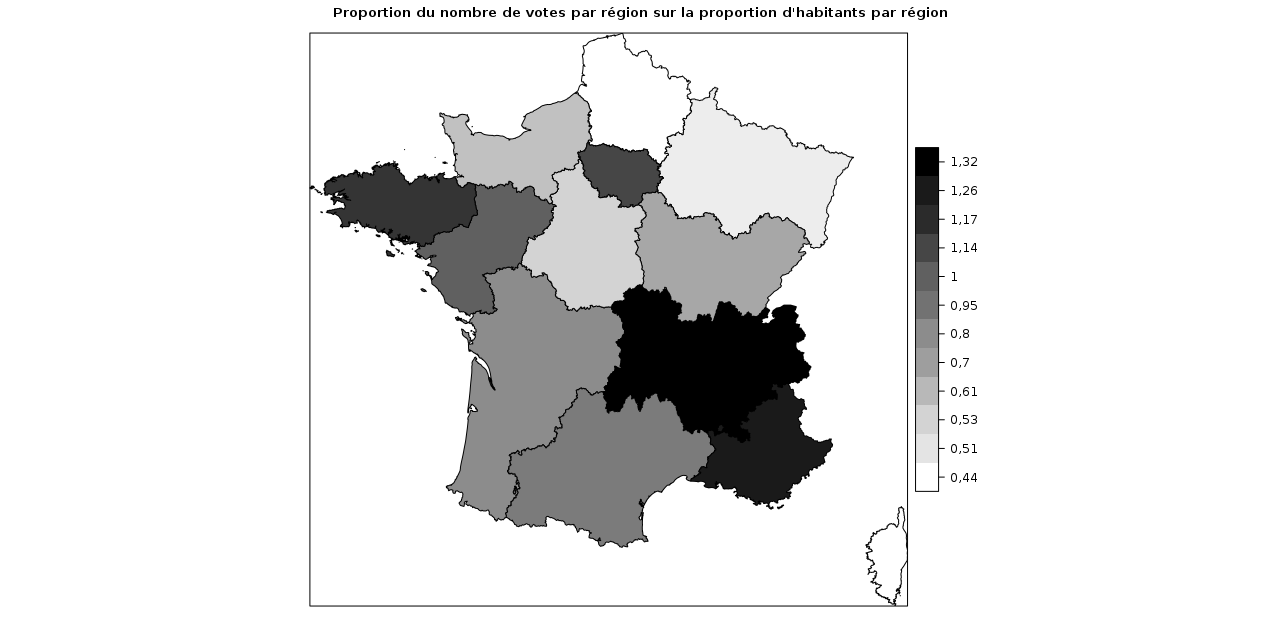


**Pour visualiser les valeurs et analyser les données pour chaque région, car sur le collab on ne peut pas interagir avec la carte :** 

1.   https://drive.google.com/file/d/122jX1PUzixSFB0OzAVg-82VzLZFDTSQT/view?usp=sharing
2.  https://drive.google.com/file/d/1yWiOLcxyHS09AuAqktYmXt7UggOu_0Gq/view?usp=sharing
3. https://drive.google.com/file/d/1ab52eCBAjybdD_qdjye0AoqcncVQrS8l/view?usp=sharing









**Graphique**

In [ ]:
## Point 7: Boîte à moustaches pour l'âge des votants

# Initialisation d'une liste pour stocker les âges des votants
Liste_age = []

# Parcours des données pour extraire les âges des votants
for i in range(donnees['total']):
    if not(donnees['results'][i]['author']['age'] == None):  # Vérification si l'âge est renseigné
        Liste_age.append(donnees['results'][i]['author']['age'])  # Ajout de l'âge à la liste

# Affichage du nombre d'individus ayant renseigné leur âge
print("Sur les {} individus, {} ont renseigné leur âge".format(donnees['total'], len(Liste_age)))

# Création du diagramme en boîte à moustaches pour visualiser la distribution des âges
plt.boxplot(Liste_age)
plt.title("Boîte à moustaches sur les âges")
plt.show()

In [ ]:
## Point 8: Nombre total/moyen de votes/propositions et visualisation

# Initialisation des compteurs pour les réactions
(pouce_vert, pouce_rouge, neutre) = (0, 0, 0)

# Calcul du nombre total de propositions et des réactions pour chaque type
print("Il y a au total {} propositions.".format(donnees['total']))
for k in range(donnees['total']):
    pouce_vert += donnees['results'][k]['votes'][0]['count']
    pouce_rouge += donnees['results'][k]['votes'][1]['count']
    neutre += donnees['results'][k]['votes'][2]['count']

# Création d'un diagramme circulaire pour visualiser la proportion des réactions
plt.pie([pouce_vert, pouce_rouge, neutre], labels=['Agree', 'Disagree', 'Neutral'], colors=['green', 'red', 'grey'], autopct=lambda x: str(round(x, 2)) + '%')
plt.title("Proportion des réactions sur toutes les propositions")
plt.show()

# Création de listes pour stocker le nombre de réactions pour chaque proposition
liste_vert = []
liste_rouge = []
liste_neutre = []

for k in range(donnees['total']):
    liste_vert.append(donnees['results'][k]['votes'][0]['count'])
    liste_rouge.append(donnees['results'][k]['votes'][1]['count'])
    liste_neutre.append(donnees['results'][k]['votes'][2]['count'])

# Calcul du nombre moyen de réactions pour chaque type par proposition
print("Le nombre moyen de pouces verts par proposition est {}".format(round(statistics.mean(liste_vert))))
print("Le nombre moyen de pouces rouges par proposition est {}".format(round(statistics.mean(liste_rouge))))
print("Le nombre moyen de pouces neutres par proposition est {}".format(round(statistics.mean(liste_neutre))))

# Visualisation de la relation entre le nombre de pouces verts et les autres réactions
plt.plot(sorted(liste_vert), sorted(liste_rouge), label='Nombre de pouces rouges=f(Nombres de pouces verts)', color='red')
plt.plot(sorted(liste_vert), sorted(liste_neutre), label='Nombre de pouces neutres=f(Nombres de pouces verts)')
plt.legend()
plt.show()

# **2. Modélisation**

## 2.1 Analyse des tags


In [ ]:
# Sélection des variables pour chaque type de données
vars1 = ['id', 'content', 'slug', 'status', 'createdAt', 'updatedAt', 'trending', 'labels', 'organisations', 'country', 'language', 'myProposal', 'idea', 'operationId', 'proposalKey', 'author.organisationName', 'author.organisationSlug', 'author.postalCode', 'author.age']
vars2 = ['voteKey', 'count', 'id', 'content']
vars3 = ['qualificationKey', 'count', 'id', 'content']
vars4 = ['tagId', 'label', 'display', 'id', 'content']
vars5 = ['selectedStakeTag.display', 'selectedStakeTag.label', 'id', 'content', 'selectedStakeTag.tagId']

In [ ]:
# Extraction de différentes bases de données à partir des données JSON

# Extraction des données de niveau 1 avec pd.json_normalize, contenant les colonnes spécifiées dans la liste vars1
df1 = pd.json_normalize(donnees["results"])

# Extraction des données de niveau 2 avec pd.json_normalize, incluant les données de votes, ainsi que les colonnes 'id' et 'content' du niveau 1
df2 = pd.json_normalize(donnees["results"], "votes", ["id", "content"])

# Extraction des données de niveau 3 avec pd.json_normalize, incluant les données de qualifications dans les votes, ainsi que les colonnes 'id' et 'content' du niveau 1
df3 = pd.json_normalize(donnees["results"], ["votes", "qualifications"], ["id", "content"])

# Extraction des données de niveau 2 avec pd.json_normalize, incluant les données de tags, ainsi que les colonnes 'id' et 'content' du niveau 1
df4 = pd.json_normalize(donnees["results"], "tags", ["id", "content"])

In [ ]:
# Exclusion des tags pour lesquels display = False

# Sélection des colonnes spécifiées dans la liste vars4
d1 = df4[vars4]

# Filtrage des lignes où la colonne 'display' est True
d1 = d1[d1['display'] == True]

# Affichage du nombre d'identifiants uniques de tags après exclusion des tags pour lesquels display = False
# Comparaison avec le nombre d'identifiants uniques de tags avant l'exclusion
print(d1['tagId'].nunique(), df4['tagId'].nunique())

# Affichage du nombre d'identifiants uniques de propositions après exclusion des tags pour lesquels display = False
# Comparaison avec le nombre d'identifiants uniques de propositions avant l'exclusion
print(d1['id'].nunique(), df4['id'].nunique())

17 35
16673 18681


Le dictionnaire des tags contient **35 tags distincts** et près de la moitié d'entre eux (**51,4%**) ont display = False. On est ainsi rendu à exploiter pour l'apprentissage supervisé **89%** (16673/18681) des propositions (en élimimant celles associées à des tags pour lesquels display = False).

In [ ]:
# Affichage des propositions pour lesquelles il y a plus d'un tag

# Regroupement des données par identifiant de proposition et comptage du nombre de tags par proposition
taille = d1.groupby(['id']).size().to_frame('size')

# Sélection des propositions ayant plus d'un tag
taille = pd.DataFrame(taille[taille["size"] > 1])

# Réinitialisation de l'index pour faciliter la manipulation des données
taille = taille.reset_index(drop=False)

# Affichage du nombre de propositions ayant plus d'un tag
print(taille['id'].count())

# Affichage des propositions ayant plus d'un tag
taille

In [ ]:
# Affichage du nombre de propositions ayant plus d'un tag
print(taille['id'].count())

2947

 **18%** (2947/16673) des propositions retenues sont associées à au moins 2 tags.

In [ ]:
# On récupère les identifiants des propositions associées à plus d'un tag dans une liste
listtaille = taille["id"].tolist()

**Les traitements qui suivent vont permettre d'analyser les couples, triplets, etc. de tags par proposition**

In [ ]:
# d1test contient les identifiants des propositions qui sont dans d1 sans répétition. mondataframe est un dataframe avec les mêmes colonnes que d1 (Initialisation).
# Ensuite, on récupère les lignes qui ont un identifiant se trouvant dans listtaille et on les concatène dans mondataframe

# Récupération des identifiants uniques des propositions dans d1
d1test = d1["id"].unique()

# Création d'une liste des noms de colonnes du DataFrame d1
colonne = list(d1.columns)

# Initialisation d'un nouveau DataFrame avec les mêmes colonnes que d1
mondataframe = pd.DataFrame(columns=colonne)

# Parcours des identifiants uniques dans d1test dans l'ordre décroissant
for i in sorted(d1test, reverse=True):
    # Vérification si l'identifiant est présent dans listtaille
    if i in listtaille:
        # Extraction des lignes correspondant à l'identifiant et concaténation dans mondataframe
        timedata = d1[(d1['id'] == i)]
        mondataframe = pd.concat([mondataframe, timedata])

# Affichage du DataFrame résultant
mondataframe

In [ ]:
# mondataframe est défini comme un DataFrame contenant les données extraites précédemment. mondataframetest contient les identifiants uniques des propositions.

# Récupération des identifiants uniques des propositions dans mondataframe
mondataframetest = mondataframe["id"].unique()

# Création d'un nouveau DataFrame mondataframe à partir du DataFrame mondataframe, qui ne fait rien ici.
mondataframe = pd.DataFrame(mondataframe)

# Affichage du DataFrame mondataframe
mondataframe

In [ ]:
# index doit être une variable dans notre DataFrame, d'où l'intérêt des lignes suivantes.

# Réinitialisation de l'index du DataFrame mondataframe avec drop=False pour conserver l'ancien index dans une colonne
mondataframe = mondataframe.reset_index(drop=False)

# Affichage du DataFrame mondataframe avec le nouvel index
mondataframe

In [ ]:
#Tri pour permettre d'eviter les probléme de symetrie (tagId1 + tagId2 different tagId2 + tagId1 )
mondataframe = mondataframe.sort_values(by = ['id', 'tagId'])

In [ ]:
# Les lignes suivantes permettent de créer la variable 'croise' dans le DataFrame, contenant le croisement des tagId (tagId1 * tagId2).

# Initialisation de la colonne 'croise' dans le DataFrame avec une chaîne vide
mondataframe['croise'] = ''

# Parcours des identifiants uniques des propositions dans mondataframetest
for i in mondataframetest:
    # Récupération des indices des lignes correspondant à l'identifiant
    indexList = mondataframe[(mondataframe['id'] == i)].index.values.astype(int)
    # Initialisation du champ fieldValue
    fieldValue = ''
    count = 0
    # Parcours des indices
    for j in indexList:
        # Si c'est la première occurence, fieldValue prend la valeur du tagId
        if count == 0:
            fieldValue = mondataframe.loc[j, 'tagId']
            count = 1
        # Sinon, le tagId est ajouté à fieldValue avec une étoile en tant que séparateur
        else:
            fieldValue = fieldValue + " * " + mondataframe.loc[j, 'tagId']
    # Mise à jour de la colonne 'croise' pour toutes les lignes correspondant à l'identifiant avec fieldValue
    for t in indexList:
        mondataframe.loc[t, 'croise'] = fieldValue

In [ ]:
# Compter l'occurrence de chaque modalité de croisement mais sur les 6629 observations précédentes (avec répétition suivant tagId).

# Utilisation de la méthode value_counts() pour compter le nombre d'occurrences de chaque modalité de croisement dans la colonne 'croise' du DataFrame
mondataframe['croise'].value_counts()

In [ ]:
# Calcul de la longueur de l'ensemble des valeurs uniques dans la colonne 'croise'.

# Utilisation de la fonction len() pour calculer la longueur de l'ensemble des valeurs uniques dans la colonne 'croise' du DataFrame
len(mondataframe['croise'].unique())

374

In [ ]:
# ATTENTION: Cette ligne de code calcule le pourcentage d'occurrence des 6 modalités de croisement les plus fréquentes dans la colonne 'croise' du DataFrame. 
# Les paramètres utilisés sont normalize=True pour obtenir les pourcentages, sort=True pour trier les valeurs par ordre décroissant, et dropna=False pour inclure les valeurs NaN le cas échéant.

# Utilisation de la méthode value_counts() avec les paramètres normalize=True, sort=True, dropna=False pour calculer le pourcentage d'occurrence des 6 modalités de croisement les plus fréquentes dans la colonne 'croise' du DataFrame.
mondataframe['croise'].value_counts(normalize=True, sort=True, dropna=False).head(6)

In [ ]:
# mondataframe_reset récupère pour chaque identifiant (id) la première ligne du sous-dataframe (pour recalculer les fréquences précédentes dans les 2947 observations).
# Cela évite les répétitions pour avoir les identifiants de manière unique et calculer des fréquences qui ont du sens.

# Extraction des identifiants uniques dans la colonne 'id' du DataFrame initial
mondataframetest = mondataframe["id"].unique()

# Création d'une liste de colonnes du DataFrame initial
colonne = list(mondataframe.columns)

# Initialisation du DataFrame mondataframe_reset avec les mêmes colonnes que le DataFrame initial
mondataframe_reset = pd.DataFrame(columns=colonne)

# Boucle sur les identifiants uniques pour récupérer la première ligne correspondante à chaque identifiant
for i in mondataframetest:
    # Récupération de l'index de la première occurrence de l'identifiant dans le DataFrame initial
    indexList = mondataframe[(mondataframe['id'] == i)].index.values.astype(int)[0]
    # Création d'un DataFrame temporaire contenant la première ligne correspondant à l'identifiant
    timeDataOne = pd.DataFrame(mondataframe.loc[indexList,])
    # Transposition du DataFrame temporaire pour avoir les données en colonnes plutôt qu'en lignes
    timeDataOne = timeDataOne.T
    # Concaténation du DataFrame temporaire avec mondataframe_reset
    mondataframe_reset = pd.concat([mondataframe_reset , timeDataOne])

# Affichage du DataFrame mondataframe_reset contenant les premières lignes pour chaque identifiant unique
mondataframe_reset

In [ ]:
# Base de données pour les associations supérieures à 1%
# La variable test2 contient le décompte des occurrences normalisé des associations de tags ('croise') supérieures à 1%.
test2 = mondataframe_reset['croise'].value_counts(normalize=True, sort=True, dropna=False).reset_index(name='percentage')

# Filtrer les associations de tags ('croise') dont la fréquence est supérieure à 1%
test2 = test2[test2['percentage'] > 0.01]

# Convertir les associations de tags ('croise') filtrées en une liste pour une utilisation ultérieure
liste = test2['index'].tolist()

# Exclure les propositions dont les associations de tags ('croise') sont supérieures à 1%
test2 = mondataframe_reset[~mondataframe_reset.croise.isin(liste)]

# Convertir les identifiants (id) des propositions filtrées en une liste
liste = test2['id'].tolist()

# Afficher la longueur de la liste, qui représente le nombre d'identifiants de propositions dont les associations de tags sont supérieures à 1%
len(liste)

1371

**Conclusion** : A partir des traitements effectués, l'on voit que la proportion des propositions ayant au moins deux tags n'est pas negligeable et qu'on doit prendre en compte cela dans la modélisation. En effet, il semble plus réaliste que des propositions puissent être associées à plusieurs tags et donc nous avons choisi pour la suite de proposer une modélisation captant cette réalité. 

##2.2 Modélisation supervisée

In [ ]:
# Sélection des variables pour chaque dataframe extrait
# vars1 contient les variables pertinentes pour le dataframe df1
vars1 = ['id', 'content', 'slug', 'status', 'createdAt', 'updatedAt', 'trending', 'labels', 'organisations', 'country', 'language', 'myProposal', 'idea', 'operationId', 'proposalKey', 'author.organisationName', 'author.organisationSlug', 'author.postalCode', 'author.age']

# vars2 contient les variables pertinentes pour le dataframe df2
vars2 = ['voteKey', 'count', 'id', 'content']

# vars3 contient les variables pertinentes pour le dataframe df3
vars3 = ['qualificationKey', 'count', 'id', 'content']

# vars4 contient les variables pertinentes pour le dataframe df4
vars4 = ['tagId', 'label', 'display', 'id', 'content']

# vars5 contient les variables pertinentes pour le dataframe df5
vars5 = ['selectedStakeTag.display', 'selectedStakeTag.label', 'id', 'content', 'selectedStakeTag.tagId']

In [ ]:
# Extraction de différentes bases de données à partir des données JSON

# df1 : Extraction de la première base de données en normalisant les données "results"
df1 = pd.json_normalize(donnees["results"])

# df2 : Extraction de la deuxième base de données en normalisant les données "votes" avec les colonnes supplémentaires "id" et "content"
df2 = pd.json_normalize(donnees["results"], "votes", ["id", "content"])

# df3 : Extraction de la troisième base de données en normalisant les données "qualifications" à partir de "votes" avec les colonnes supplémentaires "id" et "content"
df3 = pd.json_normalize(donnees["results"], ["votes", "qualifications"], ["id", "content"])

# df4 : Extraction de la quatrième base de données en normalisant les données "tags" avec les colonnes supplémentaires "id" et "content"
df4 = pd.json_normalize(donnees["results"], "tags", ["id", "content"])

### 2.2.1 Mise en forme de la base à exploiter

In [ ]:
# Extraction des propositions pour lesquelles display = True
df4 = df4[df4['display'] == True]

# Extraction des id uniques des propositions pour lesquelles display = True
list_id = df4["id"].unique().tolist()

In [ ]:
# Réinitialisation des index du dataframe à zéro pour faciliter la manipulation
df4= df4.reset_index(drop=False)

# Création d'une nouvelle colonne 'tag_croise' pour stocker les combinaisons de tags associés à chaque proposition
df4['tag_croise'] = ''

# Boucle sur les identifiants uniques des propositions
for i in list_id:
    # Obtention des indices des lignes correspondant à la proposition actuelle
    indexList = df4[(df4['id'] == i)].index.values.astype(int)
    fieldValue=''
    count=0
    # Boucle sur les indices pour construire la chaîne de caractères représentant les tags associés
    for j in indexList:
        if count == 0:
            fieldValue = df4.loc[j,]['label']
            count=1
        else:
            fieldValue = fieldValue + "|" + df4.loc[j,]['label']
    # Mise à jour de la colonne 'tag_croise' pour chaque ligne correspondant à la proposition actuelle
    for t in indexList:
        df4.loc[t,'tag_croise'] = fieldValue

In [ ]:
# Conservation des identifiants de manière unique à partir du tableau précédent
mondataframe = df4.drop_duplicates(subset=['id'], keep='first')

In [ ]:
# Définition de la base de données à traiter
# Affichage des tags (il y en a 17)
# Création des variables catégorielles par label sous forme de colonne
x = mondataframe.set_index('id').tag_croise.str.split(r'|', expand=True).stack().reset_index(level=1, drop=True).to_frame('tag_croise')
dummy = pd.get_dummies(x, prefix='', columns=['tag_croise']).groupby(level=0).sum()
dummy = dummy.reset_index(level='id')
mondataframe = pd.merge(mondataframe, dummy, left_on='id', right_on='id', how='left')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Projet Statistique/listedata.xls') # can also index sheet by name or fetch all sheets
liste = df['id'].tolist()
df = pd.read_excel('/content/drive/MyDrive/Projet Statistique/listedata 2.xls') # can also index sheet by name or fetch all sheets
listtaille = df['id'].tolist()

In [ ]:
#Dataframe pour les différents modèles

#modèle 1 : multi label avec l'ensemble des couples, triplets, etc. de tags
df_model1 = mondataframe.drop(['index', 'tagId', 'label', 'display'], axis=1)

#modèle 2 : Suppression du dataframe précédent, les combinaisons (couplets, triplets, etc) qui reviennent le moins (moins de 1%)
df_model2 = mondataframe[~mondataframe.id.isin(liste)]

#modèle 3 : Suppresion des 2947 propositions ayant au moins 2 tags
df_model3 = mondataframe[~mondataframe.id.isin(listtaille)]

#modèle 4 : Utilisation du dictionnaire selectedStakeTag
df_model4 = df1[vars5][df1['selectedStakeTag.display'] == True]

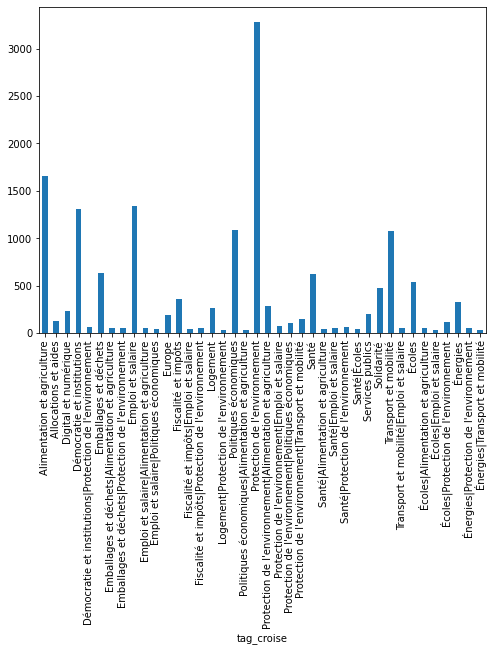

In [ ]:
fig = plt.figure(figsize=(8, 6))  # Crée une nouvelle figure avec une taille spécifiée
df_model2.groupby('tag_croise').id.count().plot.bar(ylim=0)  # Génère un graphique à barres basé sur le nombre d'occurrences de chaque catégorie de 'tag_croise'
plt.show()  # Affiche le graphique

### 2.2.2 Prétraitement (NLP)

In [ ]:
# Installation des packages necessaire
!pip install spacy
!pip install spacy_lefff
!python3 -m spacy download fr_core_news_sm

In [ ]:

spacy.cli.download("fr_core_news_sm")
nlp = spacy.load('fr_core_news_sm')

✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


In [ ]:
# import spacy
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# from nltk.stem import RegexpStemmer
# from nltk.stem.snowball import SnowballStemmer
# from nltk import stem
# from nltk import word_tokenize
#from spacy_lefff import LefffLemmatizer, POSTagger
stemmer = SnowballStemmer(language='french')
# Definition des stopword
stopwords = set(stopwords.words('french'))
stopwords.update(["dans", "dan","tout", "tous", "tou", "plus", 'mettant', 'mette', 'mettent', 'mettre',"nôtre","notre", "faire", "fait", "faisait", "faisant", "faisons", "fait", "faite", "faites", 'faits',"mettre","notr","etre", "être","falloir","faut","votre", "leur", "toute", "etc", "sans", "san","toutes", "non", "moins", "leurs", "comme", "afin", "chaque", "chacun"])

In [ ]:
# affichage des stopwords
stopwords

In [ ]:
text = " ".join(proposition for proposition in mondataframe.content)
#print ("Il y a en tout {} mots dans toutes les propositions combinées.".format(len(text)))

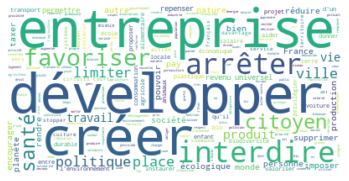

In [ ]:
#Nuage des mots des propositions
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Affichage de l'image générée en utilisant matplotlib 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Commentaire : Il a été choisi d'inclure "faut" parmi les stopwords parce que vu à quel point il intervient,
#il manque d'autres aspects plus importants

In [ ]:
#La fonction ci-dessous va permettre de tokeniser, lemmatiser, stemmatiser et enlever les stopwords avant la vectorisation 

# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()
def tokenize_lemma_stopwords(text):   
    text = nlp(text)
    tokens = [token.text for token in text]
    tokens = [t.lower() for t in tokens if t.isalpha()]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [wnl.lemmatize(t) for t in tokens]
    tokens = [stemmer.stem(t) for t in tokens]
    # Enlever stopwords
    cleanedText = " ".join(tokens)
    return cleanedText

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#La fonction ci-dessous va permettre de tokeniser, enlever les stopowords et lemmatiser
import nltk
nltk.download('wordnet')
wnl = WordNetLemmatizer()
from nltk.stem import WordNetLemmatizer
# Create WordNetLemmatizer object
def f_stopwords_lemma(text):   
    text = nlp(text)
    tokens = [token.text for token in text]
    tokens = [t.lower() for t in tokens if t.isalpha()]
    stopwords.update(["plutôt", "aussi", "entre","celui","avoir","bien","quand","impôser","via", "faut", "rendre","aider","inciter","instaurer", "permettant","permettre","créer","développer","ainsi","véritable","rendre","faudrait", "privilégier","apprendre", "ex","réapprendre", "promouvoir","interdire","diminuer","proposer","supprimer","mieux","favoriser","cette","contrôler","imposer","généraliser","soutenir","très","plafonner","france","français"])
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [wnl.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if len(t) > 2]
    cleanedText = " ".join(tokens)
    return cleanedText

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Application du traitement à nos données 
def dataCleaning(df):
    data = df.copy()
    data["content"] =data["content"].apply(tokenize_lemma_stopwords)
    return data

In [ ]:
#Application du traitement à nos données 
def dataCleaning2(df):
    data = df.copy()
    data["content"] =data["content"].apply(f_stopwords_lemma)
    return data

In [ ]:
dF = dataCleaning2(df1)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interfa

In [ ]:
dfCleaned_model1 = dataCleaning(df_model1) 
dfCleaned_model2 = dataCleaning(df_model2) 
dfCleaned_model3 = dataCleaning(df_model3) 
dfCleaned_model4 = dataCleaning(df_model4) 

In [ ]:
#On récupère les label dichotomique créés (pour la modélisation multi label)
filter_col1 = [col for col in df_model1 if col.startswith('_')]
filter_col2 = [col for col in df_model2 if col.startswith('_')]

In [ ]:
#Séparation de l'échantillon en apprentissage et test (On va effectuer la vectorisation sur l'échantillon d'apprentissage avant d'entrainer les modeles)
from sklearn.model_selection import train_test_split, GridSearchCV
X1_train,X1_test,y1_train,y1_test = train_test_split(dfCleaned_model1['content'],df_model1[filter_col1],test_size=0.3,random_state=0)
X2_train,X2_test,y2_train,y2_test = train_test_split(dfCleaned_model2['content'],df_model2[filter_col2],test_size=0.3,random_state=0)
X3_train, X3_test, y3_train, y3_test = train_test_split(dfCleaned_model3['content'], dfCleaned_model3['tag_croise'], test_size=0.3, random_state = 0)
X4_train,X4_test,y4_train,y4_test = train_test_split(dfCleaned_model4['content'],dfCleaned_model4['selectedStakeTag.label'],test_size=0.3,random_state=0)

### 2.2.2 Vectorisation

In [ ]:
#BoW
from sklearn.feature_extraction.text import CountVectorizer

count_vect3 = CountVectorizer()
X_train_counts3 = count_vect3.fit_transform(X3_train)
count_vect1 = CountVectorizer()
X_train_counts1 = count_vect1.fit_transform(X1_train)
count_vect2 = CountVectorizer()
X_train_counts2 = count_vect2.fit_transform(X2_train)
count_vect4 = CountVectorizer()
X_train_counts4 = count_vect4.fit_transform(X4_train)


In [ ]:
#Quelques résultats pour le dataframe 3
df = pd.DataFrame(X_train_counts3[0].T.todense(), index=count_vect3.get_feature_names(), columns=["BoW"])
df = df.sort_values('BoW', ascending=False)
print (df.head(5))

In [ ]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer3 = TfidfTransformer()
vectorized_train3 = tfidf_transformer3.fit_transform(X_train_counts3)
tfidf_transformer1 = TfidfTransformer()
vectorized_train1 = tfidf_transformer1.fit_transform(X_train_counts1)
tfidf_transformer2 = TfidfTransformer()
vectorized_train2 = tfidf_transformer2.fit_transform(X_train_counts2)
tfidf_transformer4 = TfidfTransformer()
vectorized_train4 = tfidf_transformer4.fit_transform(X_train_counts4)

### 2.2.3 Compilation des modèles

#### Classification multi classe

La modélisation **multi class** a été mise en oeuvre dans ce cas compte tenu de la configuration des bases de données 3 et 4.

1- Résultats avec le BoW

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf3 = MultinomialNB().fit(X_train_counts3, y3_train)
clf4 = MultinomialNB().fit(X_train_counts4, y4_train)

In [ ]:
#Les predictions
vect_test3 = count_vect3.transform(X3_test)
vect_test4 = count_vect4.transform(X4_test)
all_predictions_model3 = clf3.predict(vect_test3)
all_predictions_model4 = clf4.predict(vect_test4)

In [ ]:
from sklearn.metrics import accuracy_score,hamming_loss,classification_report
# Accuracy
# Accuracy
tab = pd.DataFrame({'Modèle 3': accuracy_score(y3_test,all_predictions_model3) , 'Modèle 4':accuracy_score(y4_test,all_predictions_model4)}, index=['Accuracy TF'])
print(tab)

In [ ]:
#Frequence de distribution des mots après prétraitement
from yellowbrick.text import FreqDistVisualizer
features = count_vect3.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(X_train_counts3)

2- Résultats avec TF-IDF

In [ ]:
#Frequence de distribution des mots après prétraitement
from yellowbrick.text import FreqDistVisualizer
features = count_vect3.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(vectorized_train3)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB().fit(vectorized_train3, y3_train)
model4 = MultinomialNB().fit(vectorized_train4, y4_train)

In [ ]:
#Les predictions
predictions_model3 = model3.predict(tfidf_transformer3.transform(vect_test3))
predictions_model4 = model4.predict(tfidf_transformer4.transform(vect_test4))

In [ ]:
from sklearn.metrics import accuracy_score,hamming_loss,classification_report
# Accuracy
# Accuracy
tab = pd.DataFrame({'Modèle 3': accuracy_score(y3_test,predictions_model3) , 'Modèle 4':accuracy_score(y4_test,predictions_model4)}, index=['Accuracy TF-IDF'])
print(tab)

In [ ]:
#Les tokens les plus fréquents par dictionnaire (BoW)
feature_names = count_vect.get_feature_names() 
 
#get tfidf vector for first document 
first_document_vector=X_train_counts[0] 
 
#print the scores 
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
print(df.sort_values(by=["tfidf"],ascending=False).head(15))

In [ ]:
#Les mots les plus fréquents pour l'ensemble des docs (propositions)
count_list = X_train_counts.toarray().sum(axis=0)
word_list = count_vect.get_feature_names()

word_freq = pd.DataFrame(count_list, index=word_list, columns=['Freq'])
print(word_freq.sort_values(by='Freq', ascending=False).head(30))

3- Validation croisée

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

pipe1 = Pipeline([
    ('vector', CountVectorizer()), 
    ('tfidf', TfidfTransformer()), 
    ('mulNB', MultinomialNB())
])

pipe2 = Pipeline([
    ('vector', CountVectorizer()), 
    ('mulNB', MultinomialNB())
])

In [ ]:
pipe1.fit(X3_train, y3_train)
pipe2.fit(X3_train, y3_train)

Pipeline(steps=[('vector', CountVectorizer()), ('mulNB', MultinomialNB())])

In [ ]:
print(pipe1.score(X3_test, y3_test))
print(pipe2.score(X3_test, y3_test))

0.5750364254492472
0.707625060709082


In [ ]:
from time import time
parameters = {
    'mulNB__alpha': [1, 0.7, 0.4, 0.2, 0.1, 0.09, 0.08, 0.07, 0.06, 0.03, 0.01] 
}

grid1 = GridSearchCV(pipe1, param_grid=parameters, cv=10, refit=True)
t0 = time()
grid1.fit(X3_train, y3_train)
print("done in %0.3fs" % (time() - t0))

done in 17.414s


In [ ]:
from time import time
parameters = {
    'mulNB__alpha': [1, 0.7, 0.4, 0.2, 0.1, 0.09, 0.08, 0.07, 0.06, 0.03, 0.01] 
}

grid2 = GridSearchCV(pipe2, param_grid=parameters, cv=10, refit=True)
t0 = time()
grid2.fit(X3_train, y3_train)
print("done in %0.3fs" % (time() - t0))

done in 16.331s


In [ ]:
print(grid1.best_score_)
print(grid1.best_params_)

0.6605926985778703
{'mulNB__alpha': 0.07}


In [ ]:
print(grid2.best_score_)
print(grid2.best_params_)

0.7059711021505377
{'mulNB__alpha': 0.4}


In [ ]:
print(grid1.score(X3_test, y3_test))
print(grid2.score(X3_test, y3_test))
#Avec la valeur d'hyperparamètre de 0.08, la précision du bayésien naif multinomial est de 67% ce qui a augmenté car on avait 57% avec la valeur de alpha à 1 par défaut

0.6704711024769305
0.7141816415735794


3- Analyse des résultats (matrice de confusion)

In [ ]:
predict_tfIdf = grid1.predict(X3_test)
predict_tf = grid2.predict(X3_test)

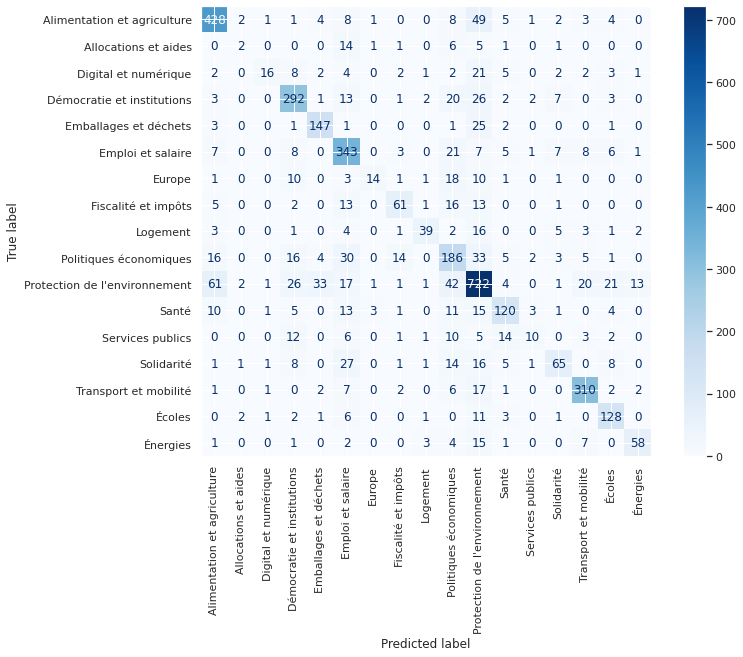

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
#titles_options = [("Confusion matrix, without normalization", None)
disp = plot_confusion_matrix(grid2, X3_test, y3_test, cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.show()

#### Classification multi label

Pour la **modélisation multi label**, 2 possibilités s'offrent à nous. L'on peut soit transformer le problème à travers différentes techniques (binary relevance, Classifier Chain et LabelPowerSet - toute sur la base du bayésien naif multinomial) soit adapter le problème en appliquant le knn multinomial directement sur les données à disposition.

##### a. Transformation du problème : Binary relevance

**Principe** :  Chaque variable cible (les labels binaires créés dans ce cas) est traité indépendemment. Cela revient dont à faire 17 classifications indépendantes.

In [ ]:
!pip install scikit-multilearn
import skmultilearn
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB,MultinomialNB
# Convertit notre configuration Multi-Label en Multi-Class
# binary classficiation
binary_rel_clf = BinaryRelevance(MultinomialNB())
model1 = binary_rel_clf.fit(vectorized_train1,y1_train)
vect_test1 = count_vect1.transform(X1_test)
model1_predict = model1.predict(tfidf_transformer1.transform(vect_test1))
vect_test2 = count_vect2.transform(X2_test)
model2 = binary_rel_clf.fit(vectorized_train2,y2_train)
model2_predict = model2.predict(tfidf_transformer2.transform(vect_test2))

In [ ]:
from sklearn.metrics import accuracy_score,hamming_loss,classification_report
# Accuracy
tab = pd.DataFrame({'Modèle 1': accuracy_score(y1_test,model1_predict) , 'Modèle 2':accuracy_score(y2_test,model2_predict)}, index=['Accuracy'])
tab

##### b. Transformation du problème : Classifier Chain

**Principe** :  Similaire au binary relevance sauf que la dépendance est prise en compte. Les propositions sont utilisées pour prédire le 1er label, ensuite l'ensemble est utilisé pour prédire le second et ainsi de suite.

In [ ]:
from skmultilearn.problem_transform import ClassifierChain
def build_model(model,mlb_estimator,xtrain,ytrain,xtest,ytest):
    # Create an Instance
    clf = mlb_estimator(model)
    clf.fit(xtrain,ytrain)
    # Predict
    clf_predictions = clf.predict(xtest)
    # Check For Accuracy
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy":acc,"hamming_score":ham}
    return result

In [ ]:
clf_chain_model1 = build_model(MultinomialNB(),ClassifierChain,vectorized_train1,y1_train,tfidf_transformer1.transform(vect_test1),y1_test)
clf_chain_model2 = build_model(MultinomialNB(),ClassifierChain,vectorized_train2,y2_train,tfidf_transformer2.transform(vect_test2),y2_test)

In [ ]:
tab = pd.DataFrame({'Modèle 1': clf_chain_model1['accuracy'] , 'Modèle 2':clf_chain_model2['accuracy']}, index=['Accuracy'])
tab

##### c. Transformation du problème : Label Powerset

**Principe** :  Cette méthode transforme le problème en modélisation multi class. Chaque combinaison de label est considéré comme une classe distincte et unique.

In [ ]:
from skmultilearn.problem_transform import LabelPowerset
clf_labelP_model1 = build_model(MultinomialNB(),LabelPowerset,vectorized_train1,y1_train,tfidf_transformer1.transform(vect_test1),y1_test)
clf_labelP_model2 = build_model(MultinomialNB(),LabelPowerset,vectorized_train2,y2_train,tfidf_transformer2.transform(vect_test2),y2_test)

In [ ]:
tab = pd.DataFrame({'Modèle 1': clf_labelP_model1['accuracy'] , 'Modèle 2':clf_labelP_model2['accuracy']}, index=['Accuracy'])
tab

In [ ]:
np.array(y3_train)

KNN comme classifieur :

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=25)
knn_clf.fit(vectorized_train3,y3_train)
ypred=knn_clf.predict(tfidf_transformer3.transform(vect_test3))

In [ ]:
from sklearn.metrics import accuracy_score,hamming_loss,classification_report
accuracy_score(y3_test,ypred)

0.674356483729966

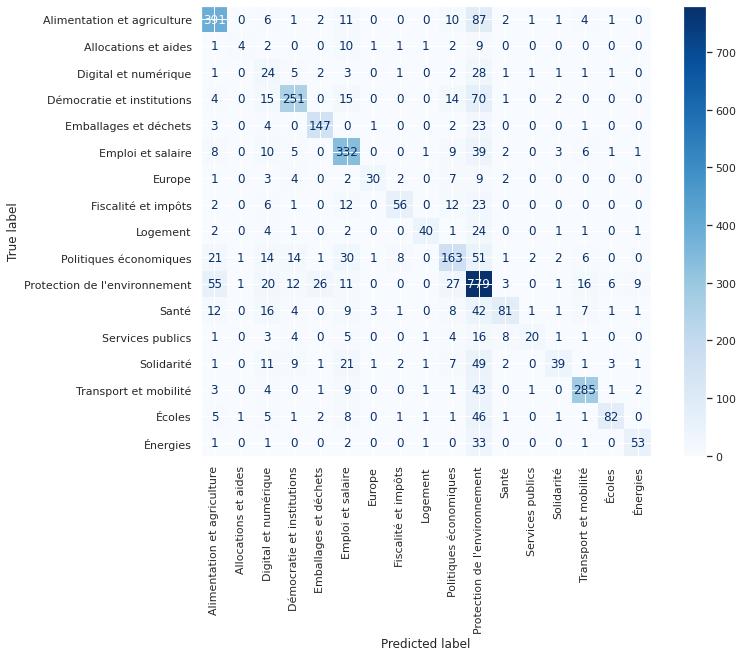

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
#titles_options = [("Confusion matrix, without normalization", None)
disp = plot_confusion_matrix(knn_clf, tfidf_transformer3.transform(vect_test3), y3_test, cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.show()

In [ ]:
#Validation croisée avec KNN

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# liste de K pour le KNN
neighbors = list(range(1, 50, 2))

# liste vide qui va contenir les scores
cv_scores = []

# Validation croisée K blocs
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_counts3,y3_train, cv=30, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 1


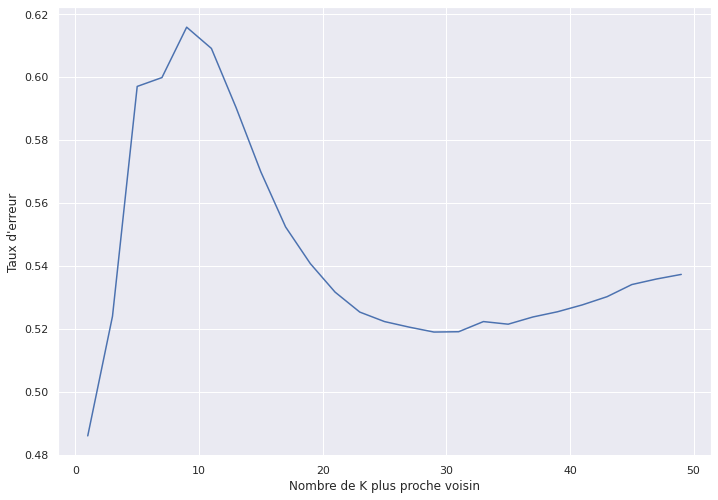

In [ ]:
# génère le taux d'erreur
mse = [1 - x for x in cv_scores]

# determine le meilleur k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Nombre de K plus proche voisin")
plt.ylabel("Taux d'erreur")
plt.show()

In [ ]:
tab = pd.DataFrame({'Modèle 1': accuracy_score(y1_test,predict_model1) , 'Modèle 2':accuracy_score(y2_test,predict_model2) , 'Modèle 3': accuracy_score(y3_test,predict_model3)}, index=['Accuracy'])
tab

## 2.3 Modélisation non supervisée

### 2.3.1 Text Clustering

In [ ]:
# CleaanedData contient les données lemmatizer et stemmatizer
cleanedData = dataCleaning(mondataframe) 
cleanedData_copie = cleanedData

In [ ]:
cleanedData

,Unnamed: 0,Unnamed: 0.1,index,tagId,label,display,id,content,tag_croise,_Alimentation et agriculture_x,_Allocations et aides_x,_Digital et numérique_x,_Démocratie et institutions_x,_Emballages et déchets_x,_Emploi et salaire_x,_Europe_x,_Fiscalité et impôts_x,_Logement_x,_Politiques économiques_x,_Protection de l'environnement_x,_Santé_x,_Services publics_x,_Solidarité_x,_Transport et mobilité_x,_Écoles_x,_Énergies_x,_Alimentation et agriculture_y,_Allocations et aides_y,_Digital et numérique_y,_Démocratie et institutions_y,_Emballages et déchets_y,_Emploi et salaire_y,_Europe_y,_Fiscalité et impôts_y,_Logement_y,_Politiques économiques_y,_Protection de l'environnement_y,_Santé_y,_Services publics_y,_Solidarité_y,_Transport et mobilité_y,_Écoles_y,_Énergies_y
0,0,0,2,e372d643-5227-41c7-99f9-5813cf074ad7,Protection de l'environnement,True,0e572827-d032-4ec8-b9ec-f67b0286d414,ger ressourc terrestr intelligent prof,Protection de l'environnement,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,5,e372d643-5227-41c7-99f9-5813cf074ad7,Protection de l'environnement,True,a8587da7-5752-4a46-8cc4-47bf5fb1eca5,enfant puiss éduqu prendr soin végétal animal ...,Protection de l'environnement,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,2,7,bead669e-ae31-4e63-95fb-9e0cb2935003,Allocations et aides,True,f4a88d15-25e4-4e39-9b32-b17910536f02,alloc familial accessibl enfant,Allocations et aides,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3,11,edb0b74d-ab68-4d04-9924-d907f8ee423e,Emploi et salaire,True,95d59a49-f9d8-495f-8b5f-3bb7ca6d94e9,valoris humain capital peut moment chang model...,Emploi et salaire|Politiques économiques,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,4,4,13,27f8e663-9c93-4c95-93ad-9c4b6488c373,Démocratie et institutions,True,502d521c-1994-4f2f-8b9a-fcbf29379182,interdir lobbying pun ceux soumettent,Démocratie et institutions,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16668,16668,16668,61228,fb43123b-4ed0-43b9-a667-35a97703e457,Alimentation et agriculture,True,7d91e0cb-153d-4b35-b873-568301283a9f,accord import product local,Alimentation et agriculture,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16669,16669,16669,61231,e372d643-5227-41c7-99f9-5813cf074ad7,Protection de l'environnement,True,28b7cf31-592a-424b-85cf-26a67c4f25a8,interdir élevag animal fourrur vison,Protection de l'environnement|Alimentation et ...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
16670,16670,16670,61234,bead669e-ae31-4e63-95fb-9e0cb2935003,Allocations et aides,True,dd72c4d6-ad0c-4240-96e9-0067aa8b9af4,renforc protect social démun,Allocations et aides,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16671,16671,16671,61237,3be0de68-00e6-4864-ba13-f0d4e6fc6bb2,Écoles,True,e71fe9cb-3afb-4959-bd68-dc73e1844c85,évolu adapt model éduc psycholog apprentissag ...,Écoles,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#representation vectorielle des mots (TF-IDF) et importation des library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from random import *
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
# Vectorization tf-idf
vectorizer = TfidfVectorizer()
vectorized_data = vectorizer.fit_transform(cleanedData['content'])

In [ ]:
print(vectorized_data)

In [ ]:
# Fixation de l'alea
random_state = 10102020
seed(11042021)

In [ ]:
# Critére du coude
Sum_of_squared_distances = []
K = range(2,20)
for k in K:
   kmm = MiniBatchKMeans(n_clusters=k,init='k-means++',compute_labels=True,random_state=random_state)
   kmm = kmm.fit(vectorized_data)
   Sum_of_squared_distances.append(kmm.inertia_)

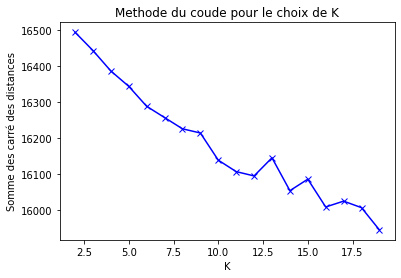

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Somme des carré des distances')
plt.title('Methode du coude pour le choix de K')
plt.show()

In [ ]:
# choix du nombre de voisin et realisation du kmeans, recuperation des labels
true_k = 11
model_kmeans = MiniBatchKMeans(n_clusters=true_k, init='k-means++', max_iter=300, random_state=random_state)
clusters = model_kmeans.fit(vectorized_data)
labels=clusters.labels_
labels

array([2, 0, 0, ..., 4, 3, 1], dtype=int32)

ACP : representation graphique

In [ ]:
# reduction des dimention pour representation 
pca = PCA(n_components=2, random_state=random_state)

# on ne peut pas reduire toute la base vectorized parce qu'elle est trop grand et que l'algorithme ne peut supporter

max_items = np.random.choice(range(vectorized_data.shape[0]), size=5000, replace=False)
reduced_features = pca.fit_transform(vectorized_data[max_items,:].todense())

reduced_cluster_centers = pca.transform(model_kmeans.cluster_centers_)


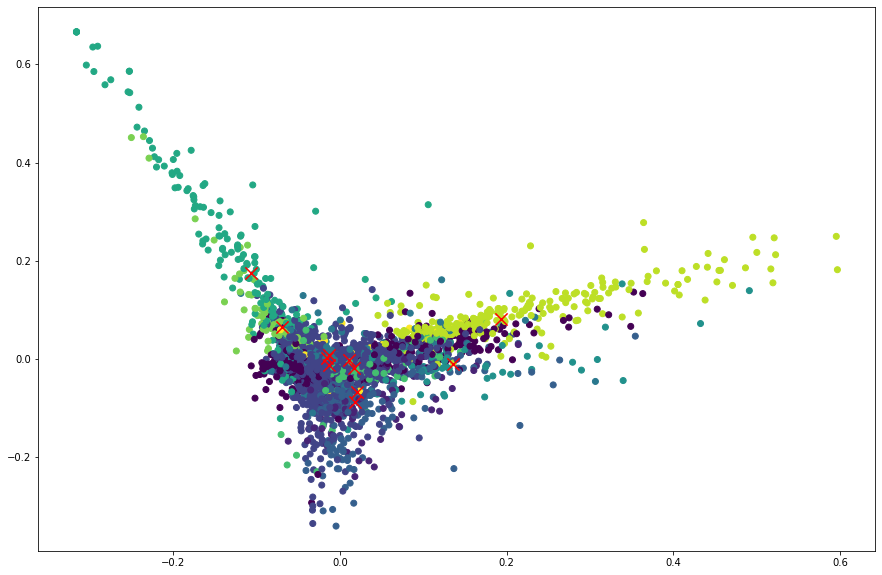

In [ ]:
# representation graphique
plt.figure(figsize=(15, 10))
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model_kmeans.predict(vectorized_data[max_items,:].todense()))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='red')

**Silhouette score [-1,1]** : indique la proximiter entre un point d'un clusters et un cluster voisin : une valeur de 1 indique une separation nette des cluster et une valeur de 0 indique que les clusters sont proches, et une valeur negative indique que les point ont ete affecte au mauvais cluster. 

The Silhouette Coefficient est calculer en utilisant la distance moyenne intra-cluster (a) et la distance moyenne au cluster le plus proche (b) pour chaque echantillon, autrement di b est la distance entre un point et le cluster le plus proche auquel il n'est pas assigné. Le Silhouette Coefficient pour un echantillon est (b - a) / max(a,b). 

In [ ]:
# test de silhouette
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(vectorized_data, labels, metric='euclidean')
silhouette_score_tf

0.008851786683645177

In [ ]:
df_present = cleanedData
df_present['Tfidf Clus Label'] = labels
df_present.head(5)

,Unnamed: 0,Unnamed: 0.1,index,tagId,label,display,id,content,tag_croise,_Alimentation et agriculture_x,_Allocations et aides_x,_Digital et numérique_x,_Démocratie et institutions_x,_Emballages et déchets_x,_Emploi et salaire_x,_Europe_x,_Fiscalité et impôts_x,_Logement_x,_Politiques économiques_x,_Protection de l'environnement_x,_Santé_x,_Services publics_x,_Solidarité_x,_Transport et mobilité_x,_Écoles_x,_Énergies_x,_Alimentation et agriculture_y,_Allocations et aides_y,_Digital et numérique_y,_Démocratie et institutions_y,_Emballages et déchets_y,_Emploi et salaire_y,_Europe_y,_Fiscalité et impôts_y,_Logement_y,_Politiques économiques_y,_Protection de l'environnement_y,_Santé_y,_Services publics_y,_Solidarité_y,_Transport et mobilité_y,_Écoles_y,_Énergies_y,Tfidf Clus Label
0,0,0,2,e372d643-5227-41c7-99f9-5813cf074ad7,Protection de l'environnement,True,0e572827-d032-4ec8-b9ec-f67b0286d414,ger ressourc terrestr intelligent prof,Protection de l'environnement,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
1,1,1,5,e372d643-5227-41c7-99f9-5813cf074ad7,Protection de l'environnement,True,a8587da7-5752-4a46-8cc4-47bf5fb1eca5,enfant puiss éduqu prendr soin végétal animal ...,Protection de l'environnement,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2,2,7,bead669e-ae31-4e63-95fb-9e0cb2935003,Allocations et aides,True,f4a88d15-25e4-4e39-9b32-b17910536f02,alloc familial accessibl enfant,Allocations et aides,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3,11,edb0b74d-ab68-4d04-9924-d907f8ee423e,Emploi et salaire,True,95d59a49-f9d8-495f-8b5f-3bb7ca6d94e9,valoris humain capital peut moment chang model...,Emploi et salaire|Politiques économiques,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,8
4,4,4,13,27f8e663-9c93-4c95-93ad-9c4b6488c373,Démocratie et institutions,True,502d521c-1994-4f2f-8b9a-fcbf29379182,interdir lobbying pun ceux soumettent,Démocratie et institutions,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7


In [ ]:
# Nombre de proposition par groupe 
df_present.groupby(['Tfidf Clus Label'])['content'].count()

Tfidf Clus Label
0     1907
1      382
2     9718
3      851
4     1001
5      208
6      521
7      717
8      349
9      788
10     231
Name: content, dtype: int64

In [ ]:
# Pour comprendre les mot renvoyer par le BOW
terms_tfidf = vectorizer.get_feature_names()
len(terms_tfidf)

7319

In [ ]:

# Groupe 0 : relatif a l'alimentation, protection des entreprise 
print("Top terms per cluster:")
order_centroids = model_kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(true_k):
    print("Groupe %d:" % i, end='')
    for ind in order_centroids[i, :6]:
        print(' %s' % terms_tfidf[ind], end='')
        print()

Top terms per cluster:
Groupe 0: local
 écol
 éduc
 enfant
 bio
 des
Groupe 1: énerg
 renouvel
 fossil
 invest
 nucléair
 consomm
Groupe 2: arrêt
 entrepris
 limit
 cré
 tax
 vill
Groupe 3: développ
 transport
 durabl
 vill
 télétravail
 commun
Groupe 4: économ
 social
 écolog
 environnemental
 system
 polit
Groupe 5: circuit
 court
 favoris
 développ
 local
 privilégi
Groupe 6: revenu
 universel
 plac
 servic
 instaur
 public
Groupe 7: interdir
 élevag
 plastiqu
 animal
 chass
 vent
Groupe 8: salair
 revaloris
 augment
 ba
 haut
 méti
Groupe 9: produit
 local
 consomm
 tax
 import
 alimentair
Groupe 10: planet
 humain
 proteg
 sauv
 écolog
 sant


In [ ]:
model_kmeans.cluster_centers_.shape

(11, 7319)

In [ ]:
order_centroids

array([[3803, 7130, 7162, ..., 4418, 4419,    0],
       [7233, 5598, 2816, ..., 4724, 4725,    0],
       [ 456, 2440, 3767, ...,  982, 3465, 3659],
       ...,
       [6005, 5698,  539, ..., 4732, 4733,    0],
       [5081, 3803, 1432, ..., 4647, 4648,    0],
       [4842, 3165, 5145, ..., 4729, 4730,    0]])

In [ ]:
# Les propositions par groupe.
for i in range(true_k):
    print("3 propositions assignée au cluster ", i)
    print("-" * 70)
    print(mondataframe.iloc[df_present.groupby(['Tfidf Clus Label']).groups[i][3]]['content'])
    print(mondataframe.iloc[df_present.groupby(['Tfidf Clus Label']).groups[i][50]]['content'])
    print(mondataframe.iloc[df_present.groupby(['Tfidf Clus Label']).groups[i][80]]['content'])
    print("_" * 70)

3 propositions assignée au cluster  0
----------------------------------------------------------------------
Il faut réapprendre à être plus autonomes : cultiver la terre, un jardin, cuisiner soit même, apprendre à coudre, faire son pain, réparer...
Il faut protéger et respecter la vie des animaux.
Il faut encourager les initiatives locales de jardins partagés et de solutions de transition énergétique, organisées en réseaux solidaires
______________________________________________________________________
3 propositions assignée au cluster  1
----------------------------------------------------------------------
Il faut investir massivement dans l'énergie hydrogène dans les transports car l'électrique n'est pas une solution durable.
Il faut profiter de l'élan gouvernemental de nationalisation des productions pour lancer un ambitieux programme d'énergie verte, d'écologie.
Il faut privilégier les énergies renouvelables et la réutilisation d'énergies perdues (ex: apport énergetique des ser

### Kmeans with the bags of world

In [ ]:
# Generating bag of words features.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
mon_sac = count_vect.fit_transform(cleanedData['content'].values)
mon_sac.shape

(16673, 7319)

In [ ]:
print(mon_sac)

  (0, 2947)	1
  (0, 5660)	1
  (0, 6564)	1
  (0, 3473)	1
  (0, 5082)	1
  (1, 2375)	1
  (1, 5254)	1
  (1, 7165)	1
  (1, 5010)	1
  (1, 6203)	1
  (1, 7039)	1
  (1, 330)	1
  (1, 6038)	1
  (1, 1909)	1
  (2, 2375)	1
  (2, 253)	1
  (2, 2630)	1
  (2, 60)	1
  (3, 6863)	1
  (3, 3165)	1
  (3, 972)	1
  (3, 4759)	1
  (3, 4128)	1
  (3, 1074)	1
  (3, 4112)	1
  :	:
  (16669, 3491)	1
  (16669, 7199)	1
  (16669, 2827)	1
  (16669, 6968)	1
  (16670, 5593)	1
  (16670, 6190)	1
  (16670, 5141)	1
  (16670, 2134)	1
  (16671, 4112)	1
  (16671, 7162)	1
  (16671, 2250)	1
  (16671, 114)	1
  (16671, 5279)	1
  (16671, 397)	1
  (16671, 4254)	1
  (16671, 7306)	1
  (16671, 5235)	1
  (16672, 7233)	2
  (16672, 6992)	1
  (16672, 2356)	1
  (16672, 4641)	1
  (16672, 5285)	1
  (16672, 6911)	1
  (16672, 2816)	1
  (16672, 6354)	1


In [ ]:
terms = count_vect.get_feature_names()
len(terms)

7319

In [ ]:
terms[1:10]

['ab',
 'abaiss',
 'abaissement',
 'abandon',
 'abandonnent',
 'abatoir',
 'abatt',
 'abattag',
 'abattoir']

In [ ]:
# importation des packages et fixation de l'aléa
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from random import *
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
random_state = 10102020
seed(11042021)

In [ ]:
# Methode du coude
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
   kmm = MiniBatchKMeans(n_clusters=k,init='k-means++',compute_labels=True,random_state=random_state)
   kmm = kmm.fit(mon_sac)
   Sum_of_squared_distances.append(kmm.inertia_)

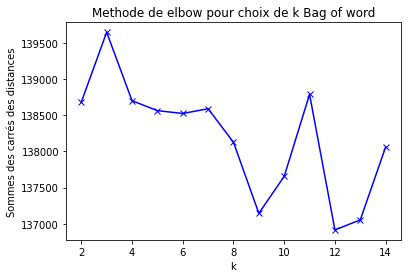

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sommes des carrés des distances')
plt.title('Methode de elbow pour choix de k Bag of word')
plt.show()

In [ ]:
# realisation du Kmeans et labels
true_k=12
kmm_sac = MiniBatchKMeans(n_clusters=true_k,init='k-means++',compute_labels=True,random_state=random_state)
kmm_sac = kmm_sac.fit(mon_sac)

labels = kmm_sac.labels_
cluster_center=kmm_sac.cluster_centers_

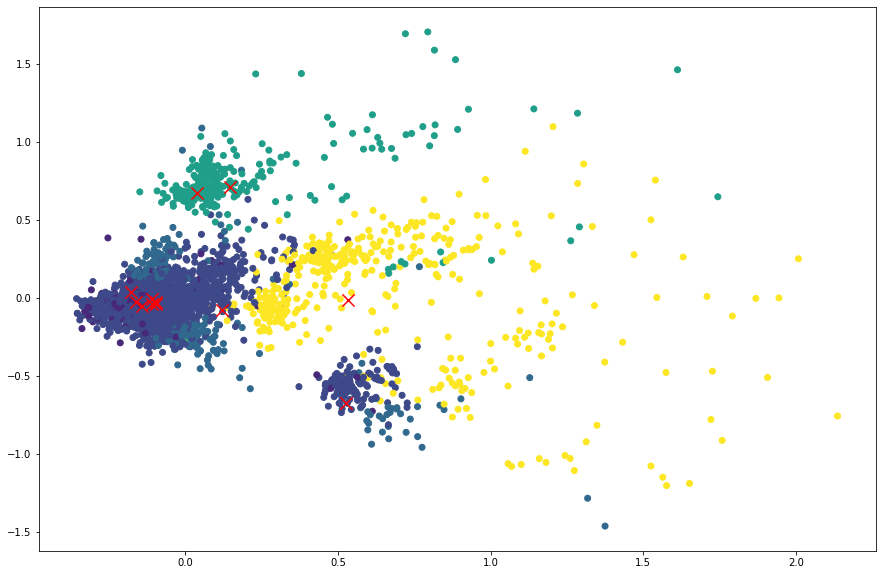

In [ ]:
# reduction pour la representation
pca = PCA(n_components=2, random_state=random_state)

# on ne peut pas reduire toute la base vectorized parce qu'elle est trop grand et que l'algorithme ne peut supporter
max_items = np.random.choice(range(mon_sac.shape[0]), size=5000, replace=False)
reduced_features = pca.fit_transform(mon_sac[max_items,:].todense())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(kmm_sac.cluster_centers_)

plt.figure(figsize=(15, 10))
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=kmm_sac.predict(mon_sac[max_items,:].todense()))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='red')

In [ ]:
cluster_center

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00099108, ..., 0.        , 0.00099108,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# Test de silhouette
from sklearn import metrics
silhouette_score = metrics.silhouette_score(mon_sac, labels, metric='euclidean')
silhouette_score

-0.05317373926635859

In [ ]:
# Labels assigner à chacun des groupes
df_sac = cleanedData
df_sac['Sac Clus Label'] = kmm_sac.labels_ # La derniere colonne indique le numeros du cluster
df_sac.head(2)

,Unnamed: 0,Unnamed: 0.1,index,tagId,label,display,id,content,tag_croise,_Alimentation et agriculture_x,_Allocations et aides_x,_Digital et numérique_x,_Démocratie et institutions_x,_Emballages et déchets_x,_Emploi et salaire_x,_Europe_x,_Fiscalité et impôts_x,_Logement_x,_Politiques économiques_x,_Protection de l'environnement_x,_Santé_x,_Services publics_x,_Solidarité_x,_Transport et mobilité_x,_Écoles_x,_Énergies_x,_Alimentation et agriculture_y,_Allocations et aides_y,_Digital et numérique_y,_Démocratie et institutions_y,_Emballages et déchets_y,_Emploi et salaire_y,_Europe_y,_Fiscalité et impôts_y,_Logement_y,_Politiques économiques_y,_Protection de l'environnement_y,_Santé_y,_Services publics_y,_Solidarité_y,_Transport et mobilité_y,_Écoles_y,_Énergies_y,Tfidf Clus Label,Sac Clus Label
0,0,0,2,e372d643-5227-41c7-99f9-5813cf074ad7,Protection de l'environnement,True,0e572827-d032-4ec8-b9ec-f67b0286d414,ger ressourc terrestr intelligent prof,Protection de l'environnement,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2
1,1,1,5,e372d643-5227-41c7-99f9-5813cf074ad7,Protection de l'environnement,True,a8587da7-5752-4a46-8cc4-47bf5fb1eca5,enfant puiss éduqu prendr soin végétal animal ...,Protection de l'environnement,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2


In [ ]:
# Nombre de proposition par groupe
# Probleme 0 a un seul element donc affichage créer des soucis
df_sac.groupby(['Sac Clus Label'])['content'].count()

Sac Clus Label
0         2
1       859
2     12384
3      1014
4         1
5       949
6        15
7         6
8         1
9      1440
10        1
11        1
Name: content, dtype: int64

In [ ]:
# Mots les plus important par cluster
print("Mots important par groupe:")
order_centroids = kmm_sac.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Mots important par groupe:
Cluster 0: administr
 mammouth
 amaigr
 œuvrent
 entraîn
 entre
 entrepr
 entreprendr
 entrepreneur
 entrepreneurial
Cluster 1: sant
 public
 servic
 éduc
 citoyen
 system
 polit
 médecin
 enseign
 financ
Cluster 2: plac
 cré
 arrêt
 interdir
 économ
 salair
 social
 citoyen
 polit
 entrepris
Cluster 3: transport
 tax
 commun
 produit
 voitur
 carbon
 limit
 favoris
 vill
 aérien
Cluster 4: propr
 respectu
 massiv
 développ
 invest
 technology
 humain
 environ
 entretien
 entrepreneur
Cluster 5: développ
 télétravail
 favoris
 énerg
 méti
 circuit
 local
 aid
 recherch
 court
Cluster 6: écart
 revenus
 resserr
 envergur
 entrer
 entrainent
 entrav
 entraîn
 entre
 entrepr
Cluster 7: consign
 oblig
 réutilis
 verr
 mis
 plac
 entrepreneur
 entrepreneuriat
 entrepreneurial
 entreprendr
Cluster 8: polluent
 cosmet
 environ
 remplac
 naturel
 produit
 interdir
 altern
 entretien
 entrepr
Cluster 9: consomm
 local
 produit
 réduir
 product
 franc
 bio
 favoris
 al

In [ ]:
# Quelques propositions par groupe
for i in range(true_k):
    print("Exemple de proposition assignée au cluster ", i)
    print("-" * 70)
    print(mondataframe.iloc[df_sac.groupby(['Sac Clus Label']).groups[i][0]]['content'])
    print('\n')
    print("_" * 70)

Exemple de proposition assignée au cluster  0
----------------------------------------------------------------------
Il faut réorganiser les administrations. Simplifier et faciliter l'administratif, diminuer la masse salariale.


______________________________________________________________________
Exemple de proposition assignée au cluster  1
----------------------------------------------------------------------
Il faut éduquer sur l'intérêt, pour notre santé et la santé de notre planète, des régimes alternatifs (flexitariens, végétariens, vegans)


______________________________________________________________________
Exemple de proposition assignée au cluster  2
----------------------------------------------------------------------
Il faut gérer les ressources terrestres avec intelligence et non à profit. 


______________________________________________________________________
Exemple de proposition assignée au cluster  3
-----------------------------------------------------------

### Word2Vec + KMeans (moyennes sur les mots)

In [ ]:
# recuperation du corpus pour entrainer le model
list_of_sent=[]
for sent in cleanedData['content'].values:
    list_of_sent.append(sent.split())

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

seed(11042021)

In [ ]:
# entrainement du Word2Vect
w2v_model=gensim.models.Word2Vec(list_of_sent,size = 1000, min_count=1)

In [ ]:
# Fonction permettant le calcul pour chaque propositions de la moyenne
import numpy as np
sent_vectors = []; # la moyenne-w2v pour chaque propositions est stocker
for sent in list_of_sent: # pour chaque propositions
    sent_vec = np.zeros(1000) # comme le vecteur des mots est de taille 0
    cnt_words =0; # nombre des mots avec un vecteurs valid 
    for word in sent: # Pour chaque mot de la sequence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape


(16673, 1000)

In [ ]:
# Nombre de groupe 
num_clus = [x for x in range(2,30)]

In [ ]:
# Methode du coude
squared_errors = []
for cluster in num_clus:
    kmeans = MiniBatchKMeans(n_clusters=cluster,init='k-means++',compute_labels=True,random_state=random_state).fit(sent_vectors) # Train Cluster
    squared_errors.append(kmeans.inertia_) # recuperation de la somme des carrés 

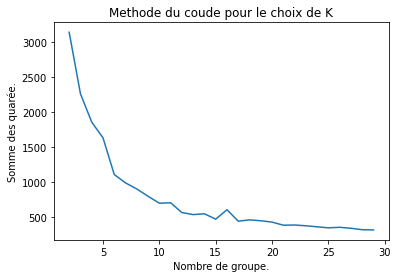

In [ ]:
# representation graphique
plt.plot(num_clus, squared_errors)
plt.title("Methode du coude pour le choix de K")
plt.xlabel("Nombre de groupe.")
plt.ylabel("Somme des quarée.")
plt.show()

In [ ]:
# Nombre optimal de groupe
optimal_clusters = 18

In [ ]:
# Kmeans sur le nombre optimal de groupe
model_kmeans = MiniBatchKMeans(n_clusters=optimal_clusters,init='k-means++',compute_labels=True,random_state=random_state) # Entrainement
clusters = model_kmeans.fit(sent_vectors)
labels_w2vect=clusters.labels_
labels_w2vect

array([13,  5, 13, ...,  0, 13,  3], dtype=int32)

In [ ]:

# ACP pour la representation en deux dimensions
pca = PCA(n_components=2, random_state=random_state)

# on ne peut pas reduire toute la base vectorized parce qu'elle est trop grand et que l'algorithme ne peut supporter

max_items = np.random.choice(range(sent_vectors.shape[0]), size=5000, replace=False)
reduced_features = pca.fit_transform(sent_vectors[max_items,:])


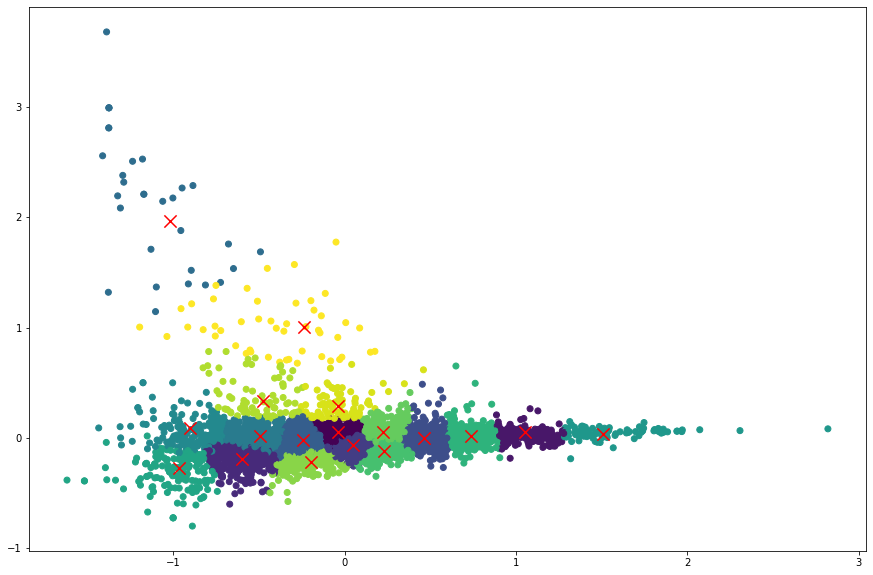

In [ ]:

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model_kmeans.cluster_centers_)

plt.figure(figsize=(15, 10))
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model_kmeans.predict(sent_vectors[max_items,:]))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='red')


In [ ]:
# test de silhouette
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(sent_vectors, labels_w2vect, metric='euclidean')
silhouette_score_tf

0.27068057758236924

In [ ]:
# Recuperation du data frame
df_present = cleanedData
df_present['Label_word2vec'] = labels_w2vect
df_present.head(5)

,Unnamed: 0,Unnamed: 0.1,index,tagId,label,display,id,content,tag_croise,_Alimentation et agriculture_x,_Allocations et aides_x,_Digital et numérique_x,_Démocratie et institutions_x,_Emballages et déchets_x,_Emploi et salaire_x,_Europe_x,_Fiscalité et impôts_x,_Logement_x,_Politiques économiques_x,_Protection de l'environnement_x,_Santé_x,_Services publics_x,_Solidarité_x,_Transport et mobilité_x,_Écoles_x,_Énergies_x,_Alimentation et agriculture_y,_Allocations et aides_y,_Digital et numérique_y,_Démocratie et institutions_y,_Emballages et déchets_y,_Emploi et salaire_y,_Europe_y,_Fiscalité et impôts_y,_Logement_y,_Politiques économiques_y,_Protection de l'environnement_y,_Santé_y,_Services publics_y,_Solidarité_y,_Transport et mobilité_y,_Écoles_y,_Énergies_y,Tfidf Clus Label,Sac Clus Label,Label_word2vec
0,0,0,2,e372d643-5227-41c7-99f9-5813cf074ad7,Protection de l'environnement,True,0e572827-d032-4ec8-b9ec-f67b0286d414,ger ressourc terrestr intelligent prof,Protection de l'environnement,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,13
1,1,1,5,e372d643-5227-41c7-99f9-5813cf074ad7,Protection de l'environnement,True,a8587da7-5752-4a46-8cc4-47bf5fb1eca5,enfant puiss éduqu prendr soin végétal animal ...,Protection de l'environnement,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,5
2,2,2,7,bead669e-ae31-4e63-95fb-9e0cb2935003,Allocations et aides,True,f4a88d15-25e4-4e39-9b32-b17910536f02,alloc familial accessibl enfant,Allocations et aides,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,13
3,3,3,11,edb0b74d-ab68-4d04-9924-d907f8ee423e,Emploi et salaire,True,95d59a49-f9d8-495f-8b5f-3bb7ca6d94e9,valoris humain capital peut moment chang model...,Emploi et salaire|Politiques économiques,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,8,2,15
4,4,4,13,27f8e663-9c93-4c95-93ad-9c4b6488c373,Démocratie et institutions,True,502d521c-1994-4f2f-8b9a-fcbf29379182,interdir lobbying pun ceux soumettent,Démocratie et institutions,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2,4


In [ ]:
# Nombre de proposition par cluster
df_present.groupby(['Label_word2vec'])['content'].count()

Label_word2vec
0     1302
1      756
2     1269
3     1350
4     1865
5     1860
6      100
7     1497
8      627
9      297
10     572
11    1257
12     830
13    1471
14     935
15     245
16     274
17     166
Name: content, dtype: int64

In [ ]:
X = w2v_model[w2v_model.wv.vocab]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
# Affichager des groupes créer
assigned_clusters = cluster
print (assigned_clusters)

29


In [ ]:
# Proposition assignée a chaque groupe.
for i in range(18):
    print("5 propositions assignée au groupe ", i)
    #print("-" * 70)
    print(mondataframe.iloc[df_present.groupby(['Label_word2vec']).groups[i][3]]['content'])
    print(mondataframe.iloc[df_present.groupby(['Label_word2vec']).groups[i][50]]['content'])
    print(mondataframe.iloc[df_present.groupby(['Label_word2vec']).groups[i][35]]['content'])
    print(mondataframe.iloc[df_present.groupby(['Label_word2vec']).groups[i][10]]['content'])
    print(mondataframe.iloc[df_present.groupby(['Label_word2vec']).groups[i][60]]['content'])
    print("_" * 140)

5 propositions assignée au groupe  0
Il faut ne tenir compte que de l'économie réelle et bannir la finance
Il faut en finir avec les plastiques à usage unique avec la mise en place de consigne en verre bouteille, bocaux ! 
Il faut éduquer les enfants face aux personnes âgées handicapées en imposant un respect sur les trottoirs
Il faut créer des instances supranationales, avec de vrais pouvoirs, permettant de réguler l’impact humain sur l’environnement. 
Il faut proposer des programmes pédagogiques, sur la notion de zone critique, afin de percevoir l'impact environnemental
____________________________________________________________________________________________________________________________________________
5 propositions assignée au groupe  1
Il faut mettre fin à l'impression par défaut des tickets de caisse et plutôt les imprimer uniquement sur demande. Sauvons nos forêts !
Il faut créer des maisons relais et des pensions de famille pour les plus précaires
Il faut fusionner la Hau

### 2.3.2 Topic modeling with LDA

In [ ]:
!pip install pyLDAvis

In [ ]:
import re
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
#import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(dF.content))

NameError: ignored

In [ ]:
# Construction des modèles bigrams et trigrams
bigram = gensim.models.Phrases(data_words, min_count=1, threshold=20) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=20)  

# Un moyen plus rapide d'obtenir une phrase en trigramme / bigramme
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)



In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [ ]:
data_f = make_bigrams(data_words)

In [ ]:
# Creation du dictionnaire
id2word = corpora.Dictionary(data_f)

# Create du corpus
texts = data_f

# Frequence des termes dans les doncs
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# View
print(corpus[:1000])

In [ ]:
# Construction du modèle LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=25, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print les mots clés des 10 premiers topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_f, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -28.9337862643636

Coherence Score:  0.46141176790813015


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(lda_model)
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Pour lancer la fonction calculant les scores de cohérence en fonction du nombre de topic (Prend du temps à compiler)
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_f, start=2, limit=40, step=6)

In [ ]:
# Représentation du graphe
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
  # Initialise le dataframe qui va contenir les éléments 
  sent_topics_df = pd.DataFrame()

  #Récupère les topics principaux de chaque document 
  for i, row in enumerate(ldamodel[corpus]):
    row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
    # row = sorted(row, key=lambda x: (x[1]), reverse=True) # old line
    # Get the Dominant topic, Perc Contribution and Keywords for each document
    for j, (topic_num, prop_topic) in enumerate(row):
      if j == 0: # => dominant topic
        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
      else:
        break
  sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

  # Add original text to the end of the output
  #contents = pd.Series(texts)
  #sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
  return(sent_topics_df)

  

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)
#df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords']

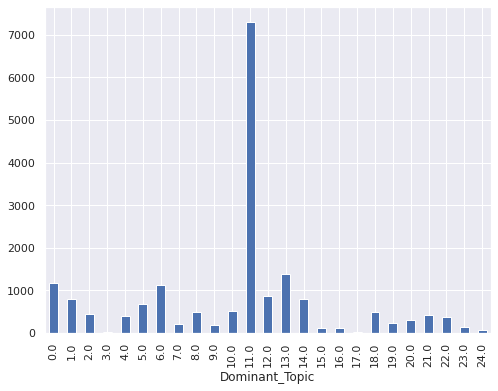

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df_dominant_topic.groupby('Dominant_Topic').Document_No.count().plot.bar(ylim=0)
plt.show()

In [ ]:
!pip uninstall pandas
!pip install pandas==1.1.5
df_dominant_topic.to_csv('/content/drive/MyDrive/Projet Statistique/df_dominant_topic.csv')


###2.3.3 Topic modeling with Nmf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer()
vectorized_X = tfidf_vectorizer.fit_transform(dF.content)

In [ ]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [ ]:
!pip install -U "scikit-learn==0.22.1"

In [ ]:

from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 20
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(vectorized_X)

Selection du nombre de thèmes avec le Topic Coherence 
Source : https://nbviewer.jupyter.org/urls/gitlab8.trifork.nl/sofiah/topic-modelling-blog/raw/master/notebooks/topic-modelling-nmf.ipynb#topic=0&lambda=1&term=

In [ ]:
# Create this generator to feed words into the Word2Vec model
class WordGenerator:
    '''
    Given a document it tokenises it (split in words) and yields one a at a time.
    '''
    def __init__(self, blogs):
        self.blogs = blogs

    def __iter__( self ):
        for blog in self.blogs:
            sentence_tokens = nlp(str(blog))        
            tokens = []
            for tok in sentence_tokens:
                if len(tok) >= 2:
                    tokens.append(tok.text)
            yield tokens


In [ ]:
# Train our own word2vec model on the blog posts. The size is the number of dimensions of the embedding space and the min_count is the number of times a word needs to
# appear in the corpus to be considered
word_gen = WordGenerator(dF.content.tolist())
w2v_model = gensim.models.Word2Vec(word_gen, min_count=5, sg=1)
print("The w2v model has been trained on %d terms" % len(w2v_model.wv.index_to_key))
w2v_model.save("w2v_model.bin")
w2v_lookup = w2v_model.wv
#del w2v_model 

The w2v model has been trained on 3881 terms


In [ ]:
from itertools import combinations
def compute_TC_W2V(w2v_lookup, topics_words):

    '''
    Compute TC_W2V for the topics of a model using the w2v_lookup.
    TC_W2V is calculated for all possible pairs of words in the topic and then averaged with the mean for that topic.
    The total TC_W2V for the model is the mean over all topics.
    '''
    total_coherence = 0.0
    for topic_index in range(len(topics_words)):
        # Compute coherence per pair of words
        pair_scores = []
        for pair in combinations(topics_words[topic_index], 2):
            try:
                pair_scores.append(w2v_lookup.similarity(pair[0], pair[1]))
            except KeyError as e:
                # If word is not in the word2vec model then as score 0.5
                print(e)
                pair_scores.append(0.5)  
        # get the mean over all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        total_coherence += topic_score
    # get the mean score across all topics
    return total_coherence / len(topics_words)

In [ ]:
def get_words_per_topic(topic_vec, feature_names, num_top_words):
    '''
    Returns a list with the num_top_words with the highest score for the topic given
    '''
    return [feature_names[i] for i in topic_vec.argsort()[:-num_top_words - 1:-1]]

In [ ]:
kmin, kmax = 2, 30   
k_values = []  # used later to plot
tc_w2v = []
num_top_words = 10
for k in range(kmin, kmax + 1):
    # Train a NMF model with the current k
    nmf_model = NMF(n_components=k, random_state=42, init='nndsvd', alpha=0.1, l1_ratio = 0.5)
    nmf_W = nmf_model.fit_transform(vectorized_X)
    nmf_H = nmf_model.components_
    # Create list of topics, each topic is described by the num_top_words words with highest score
    topics_words = []
    for topic_index in range(k):
        topics_words.append(get_words_per_topic(nmf_H[topic_index], tfidf_feature_names, num_top_words))

    # Compute the coherence for the topics for model with k topics
    k_values.append(k)
    tc_w2v.append(compute_TC_W2V(w2v_lookup, topics_words))
    print("TC_W2V(k=%d) = %.4f" % (k, tc_w2v[-1]))

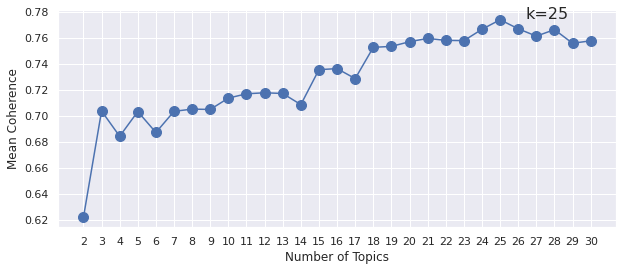

In [ ]:
# Plot the coherences for the k and find the highest
import seaborn as sns
sns.set()
fig = plt.figure(figsize=(10,4))
# create the line plot
ax = plt.plot(k_values, tc_w2v)
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter(k_values, tc_w2v, s=100)
# find and annotate the maximum point on the plot
ymax = max(tc_w2v)
xpos = tc_w2v.index(ymax)
best_k = k_values[xpos]
plt.annotate("k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
plt.show()

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
no_top_words = 7
display_topics(nmf, tfidf_feature_names, no_top_words)

In [ ]:
#Creation du dataframe qui va comporter les données
topics = []
for topic_idx, topic in enumerate(nmf.components_):
  topics.append(" ".join([tfidf_feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
df_topic = pd.DataFrame()
for topic_idx, topic in enumerate(nmf.components_):
  df_topic = df_topic.append(pd.Series([topic_idx, " ".join([tfidf_feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])]),  ignore_index=True)

In [ ]:
df_topic

In [ ]:
#Sauvegarde de la base de données
#!pip uninstall pandas
#!pip install pandas==1.1.5
#df_topic.to_csv('/content/drive/MyDrive/Projet Statistique/df_topic.csv')

In [ ]:
doc_topic_distrib = nmf.transform(vectorized_X)

In [ ]:
df = pd.DataFrame()
for n in range(doc_topic_distrib.shape[0]):
    topic_most_pr = doc_topic_distrib[n].argmax()
    df = df.append(pd.Series([n,topic_most_pr, topics[topic_most_pr], df1.content[n]]), ignore_index=True)

In [ ]:
#df.to_csv('/content/drive/MyDrive/Projet Statistique/topics_df.csv')

In [ ]:
pd.set_option('display.max_colwidth', None)
df.columns = ['doc_No','No_thèmes','topic','propositions']
df

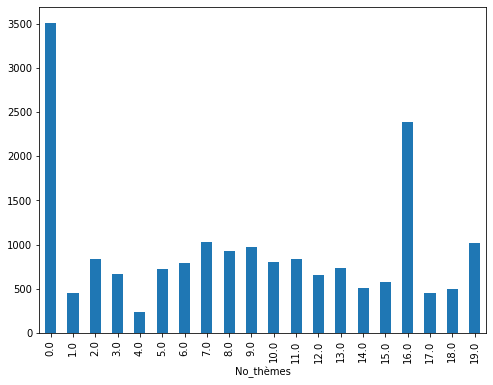

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('No_thèmes').doc_No.count().plot.bar(ylim=0)
plt.show()

### 2.3.4 Nearest Neighbors Search

#### TF-IDF + KNN

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features=10_000)
features = vec.fit_transform(mondataframe['content'])
print(features.shape)

# Model
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=10, metric='cosine') # Métrique généralement utilisée pour évaluer la similarité de textes
                                                        # Autres métriques: euclidean, cityblock, l1, l2, manhattan
knn.fit(features)

# Résultats
list_indices_tfidf = knn.kneighbors(features, return_distance=False)
#list_indices Contient la liste des indices des 10 plus proches voisins pour chaque proposition

(16673, 10000)


In [ ]:
# Affichage des propositions avec leur dix plus proches voisins
for knn in list_indices_tfidf:
    for i in range (0, len(knn)):
        print(mondataframe['content'][knn[i]]) ;
    print("---------------------------------------------------");

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
---------------------------------------------------
Il faut limiter strictement le temps de travail et libérer du temps pour les initiatives sociales, culturelles et environnementales.
Il faut réduire le temps de travail afin de valoriser les pratiques sportives et culturelles, avoir plus de temps pour soi et pour les autr 
Il faut réduire le temps de travail/augmenter le temps de formation
Il faut diminuer le temps de travail
Il faut diminuer le temps de travail 
Il faut que le temps travail soit équivalent au temps loisirs et vie familiale... PARTAGE DU TEMPS DE TRAVAIL...
Il faut réduire le temps de travail pour avoir plus de temps pour les activités solidaires.
Il faut réduire le temps de travail et la semaine scolaire pour du temps de qualité en famille
Il faut diminuer le temps de travail pour le partager et pour retrouver le temps de profiter. 
Il faut faciliter le passage au temps partiel afin de libé

In [ ]:
# Création de la colonne contenant les classes d'appartenance
mondataframe['class'] = ""
nclass = 0

for knn in list_indices_tfidf:
    
    for i in range (0, len(knn)):
        mondataframe['class'][knn[i]] += str(nclass) + ","
    nclass+=1

# Affichage
c = ['content', 'class']
mondataframe[c].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,content,class
0,Il faut gérer les ressources terrestres avec i...,"0,842,7076,12180,12255,"
1,Il faut que chaque enfant puisse être éduqué a...,"1,10206,11859,12985,13223,13432,"
2,Il faut que les allocations familiales soient ...,"2,962,1833,4275,4366,6940,9294,10275,"
3,Il faut valoriser l'humain et non le capitalis...,"3,5665,5728,6154,8402,8823,12037,13709,"
4,Il faut interdire le lobbying et punir ceux qu...,"4,63,2244,3426,7878,8083,"


#### Word2vec + KNN (moyenne des mots)

In [ ]:
# Tokenisation, lemmatisation et stopwords
propositions_toklem = list(tokenize_lemma_stopwords(p).split() for p in mondataframe['content'])

In [ ]:
# word2vec
from gensim.models import word2vec
model_w2v = word2vec.Word2Vec(propositions_toklem, vector_size=1000, min_count=1)
model_w2v.corpus_count

16673

In [ ]:
#Fonctions de conversions

def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return np.zeros((model.vector_size,))

def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

def nb_word(phrase):
    i = 0
    for w in phrase:
        i = i + 1
    return i

def mean_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase) / nb_word(phrase)

def word2vec_features_mean(X, model):
    feats = np.vstack([mean_vectors(p, model) for p in X])
    return feats

wv_features_mean = word2vec_features_mean(propositions_toklem, model_w2v)
# wv_features_mean.shape

In [ ]:
# KNN
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=10, metric='cosine')
knn.fit(wv_features_mean)

# Résultats
list_indices_w2v = knn.kneighbors(wv_features_mean, return_distance=False)

In [ ]:
# Affichage des groupes de propositions
for knn in list_indices_w2v:
    for i in range (0, len(knn)):
        print(BD['content'][knn[i]]) ;
    print("---------------------------------------------------");

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Il faut arrêter la fabrication des emballages plastiques pour les cosmétiques, gel douche, lessives, produits ménagers, yaourts, etc...
Il faut sortir les grandes Universités de leur forte dépendance au système économique européen et à  une vision de profit
Il faut mettre en place une économie qui a pour objectif de préserver les ressources plutôt que de les gaspiller inutilement.
Il faut redéfinir tout le système capitaliste actuel : changer le bancaire, la production, le transport, la consommation, le marketing, etc.
---------------------------------------------------
Il faut faire de l'éducation à  l'alimentation pendant toute la scolarité.
Il faut indiquer la méthode d'abattage sur la viande.
Il faut retisser les liens humains et se désintoxiquer des jugements de valeurs mis en place dans cette société.
Il faut reconnaître le statut de proche aidant et leur assurer un revenu décent à  ceux qui s'occupent 

#### Doc2vec + KNN

In [ ]:
# doc2vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(propositions_toklem)]
model_doc2vec = Doc2Vec(documents, vector_size=1000, window=2, min_count=1, workers=4)

def doc2vec_features(X):
    feats_doc2vec = np.vstack([model_doc2vec.infer_vector(p) for p in X])
    return feats_doc2vec

dv_features = doc2vec_features(propositions_toklem)
#dv_features.shape

In [ ]:
# KNN
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=10, metric='cosine')
knn.fit(dv_features)

# Résultats
list_indices_dv = knn.kneighbors(dv_features, return_distance=False)

In [ ]:
# Affichage des groupes de propositions
for knn in list_indices_dv:
    for i in range (0, len(knn)):
        print(BD['content'][knn[i]]) ;
    print("---------------------------------------------------");

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Il faut restaurer et augmenter les lignes ferroviaires, au lieu d'agrandir les aéroports 
---------------------------------------------------
Il faut faire de l'éducation à  l'alimentation pendant toute la scolarité.
Il faut reconnaître le statut de proche aidant et leur assurer un revenu décent à  ceux qui s'occupent d'une personne handicapée
Il faut supprimer toutes les zones blanches au titre de l'égalité des chances 
Il faut quitter l'Europe si elle est ou devient un frein à  l'évolution sociale, économique et écologique pour la France.
Il faut que chaque société forme un groupe de travail pour mettre en place des mesures limitant l'impact environnemental de la société
Il faut revaloriser certains métiers : enseignant.es, infirmier.es, aide soignant.es, aides à  domiciles... 
Il faut moins investir dans la durée de la vie humaine que dans sa qualité, mieux vaut "bien" vivre que vivre vieux.
Il faut privil